Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

In [89]:
# warnings
import warnings
warnings.filterwarnings("ignore")

In [90]:
# Carga funciones propias reutilizables  de librerías
import os as so
import sys
utils_path = so.path.join(so.getcwd(), '..', 'utils')
sys.path.append(utils_path)

In [91]:
from utils import *

In [92]:
class PATH():
    RAW = '..\\data\\'
    PROCESSED='..\\models\\'
    MODELS = '..\\models\\'

In [93]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [94]:
import pandas as pd
import numpy as np
import pickle

In [95]:
# pandas config
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# seaborn config
colors_palette=sns.color_palette('colorblind')

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [99]:
import python_clustering

In [100]:
from BorutaShap import BorutaShap

# 3. <a id='toc3_'></a>[EDA](#toc0_)

In [101]:
target='target'

## 3.1. <a id='toc3_1_'></a>[Carga datos](#toc0_)


In [102]:
df_train = pd.read_csv(PATH.RAW + 'train.csv')
df_test = pd.read_csv(PATH.RAW +'test.csv')

In [103]:
df=df_train.copy()

In [104]:
df.set_index('ID', inplace=True)
df.rename(columns={'target':'Objetivo'}, inplace=True)
target='Objetivo'

In [105]:
df.head()

col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  col11  \
ID                                                                         
4995  0.02 26.80  0.09  1.35  0.06  0.09  0.09  1.97  1.48   0.00   0.01   
1709  1.13  3.95  0.32  3.95  0.03  4.66  0.56  1.89  1.36   0.82   0.82   
7825  0.07  8.05  0.04  0.14  0.04  0.06  0.06  0.05  0.00   0.00   0.00   
6918  0.09 26.40  0.03  0.92  0.09  0.57  0.00  0.36  0.03   0.23   0.00   
5     0.94 14.47  0.03  2.88  0.00  0.80  0.43  1.38  0.11   0.67   0.67   

      col12  col13  col14  col15  col16  col17  col18  col19  col20  Objetivo  
ID                                                                             
4995   0.03   9.52   0.84   0.00   1.24   0.96   0.09   0.08   0.08         0  
1709   0.17  13.83   1.15   0.01  10.55   3.76   0.02   0.45   0.06         0  
7825   0.12   2.61   1.52   0.01   4.13   0.27   0.03   0.03   0.01         0  
6918   0.06   5.22   1.96   0.00  11.32   0.25   0.09   0.01   0.05         0  
5      0.14   9.75   1.89   0.01  27.17   5.42   0.08   0.19   0.02         1

In [106]:
df.tail()

col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  col11  \
ID                                                                         
3048  0.01  8.92  0.20  4.88  0.05  0.36  0.09  0.54  0.14   0.27   0.00   
2130  0.09  1.36  0.04  3.45  0.00  3.42  0.03  1.39  1.12   0.10   0.00   
5005  0.10  4.95  0.01  0.25  0.04  0.09  0.10  1.88  0.33   0.00   0.01   
2125  0.05 23.18  0.04  3.65  0.00  4.43  0.63  1.94  1.27   0.08   0.01   
3294  0.09 10.81  0.69  2.67  0.06  5.97  0.02  1.15  0.53   0.66   0.66   

      col12  col13  col14  col15  col16  col17  col18  col19  col20  Objetivo  
ID                                                                             
3048   0.07   8.60   1.90   0.01  17.18   2.91   0.08   0.43   0.09         0  
2130   0.11   9.36   1.58   0.01  42.15   4.39   0.02   0.11   0.07         0  
5005   0.02  18.78   0.62   0.01   5.97   0.32   0.10   0.10   0.08         0  
2125   0.19  13.32   1.93   0.01  23.84   4.80   0.08   0.22   0.07         0  
3294   0.09   8.15   1.72   0.00  36.53   5.66   0.00   0.17   0.02         0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5597 entries, 4995 to 3294
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   col1      5597 non-null   float64
 1   col2      5597 non-null   float64
 2   col3      5597 non-null   float64
 3   col4      5597 non-null   float64
 4   col5      5597 non-null   float64
 5   col6      5597 non-null   float64
 6   col7      5597 non-null   float64
 7   col8      5597 non-null   float64
 8   col9      5597 non-null   float64
 9   col10     5597 non-null   float64
 10  col11     5597 non-null   float64
 11  col12     5597 non-null   float64
 12  col13     5597 non-null   float64
 13  col14     5597 non-null   float64
 14  col15     5597 non-null   float64
 15  col16     5597 non-null   float64
 16  col17     5597 non-null   float64
 17  col18     5597 non-null   float64
 18  col19     5597 non-null   float64
 19  col20     5597 non-null   float64
 20  Objetivo  5597 non-null   int64 

In [108]:
df.describe(include='all').T

count  mean   std   min  25%   50%   75%   max
col1     5597.00  0.67  1.27  0.00 0.04  0.07  0.29  5.05
col2     5597.00 14.44  8.85 -0.08 6.85 14.39 22.26 29.84
col3     5597.00  0.16  0.25  0.00 0.03  0.05  0.10  1.05
col4     5597.00  1.58  1.22  0.00 0.55  1.21  2.51  4.94
col5     5597.00  0.04  0.04  0.00 0.01  0.04  0.07  0.13
col6     5597.00  2.21  2.58  0.00 0.10  0.55  4.33  8.66
col7     5597.00  0.25  0.27  0.00 0.05  0.09  0.45  0.90
col8     5597.00  0.81  0.65  0.00 0.09  0.75  1.39  2.00
col9     5597.00  0.77  0.44  0.00 0.40  0.76  1.16  1.50
col10    5597.00  0.32  0.33  0.00 0.00  0.23  0.61  1.00
col11    5597.00  0.33  0.38  0.00 0.00  0.01  0.70  1.00
col12    5597.00  0.10  0.06  0.00 0.05  0.10  0.15  0.20
col13    5597.00  9.82  5.58  0.01 4.94  9.86 14.69 19.82
col14    5597.00  1.33  0.57  0.00 1.01  1.42  1.76  2.89
col15    5597.00  0.01  0.00  0.00 0.00  0.01  0.01  0.01
col16    5597.00 16.62 17.73  0.00 2.22  7.84 29.98 60.01
col17    5597.00  2.93  2.33  0.00 0.82  2.43  4.67  7.99
col18    5597.00  0.05  0.03  0.00 0.02  0.05  0.07  0.10
col19    5597.00  0.15  0.14  0.00 0.04  0.08  0.25  0.50
col20    5597.00  0.04  0.03  0.00 0.02  0.05  0.07  0.09
Objetivo 5597.00  0.11  0.32  0.00 0.00  0.00  0.00  1.00

Highlights: Sin missings, no tiene mucha cardinalidad.

In [109]:
contains_inf = df.isin([np.inf, -np.inf]).any().any()
contains_inf

False

No hay infinitos

In [110]:
duplicados = df.duplicated().any()
duplicados

False

Sin duplicados

# 4. <a id='toc4_'></a>[Problema Machine Learning](#toc0_)
   

In [111]:
df[target] = df[target].astype('category')

In [112]:
df[target].value_counts() / len(df[target])

Objetivo
0   0.89
1   0.11
Name: count, dtype: float64

La target está desbalanceada, hay que realizar smote

In [113]:
categoricas = df.columns[df.dtypes=="object"].tolist()
numericas = df.columns[df.dtypes!="object"].tolist()

In [114]:
print(categoricas)
print(numericas)

[]
['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'Objetivo']


# 6. <a id='toc6_'></a>[Análisis univariante](#toc0_)


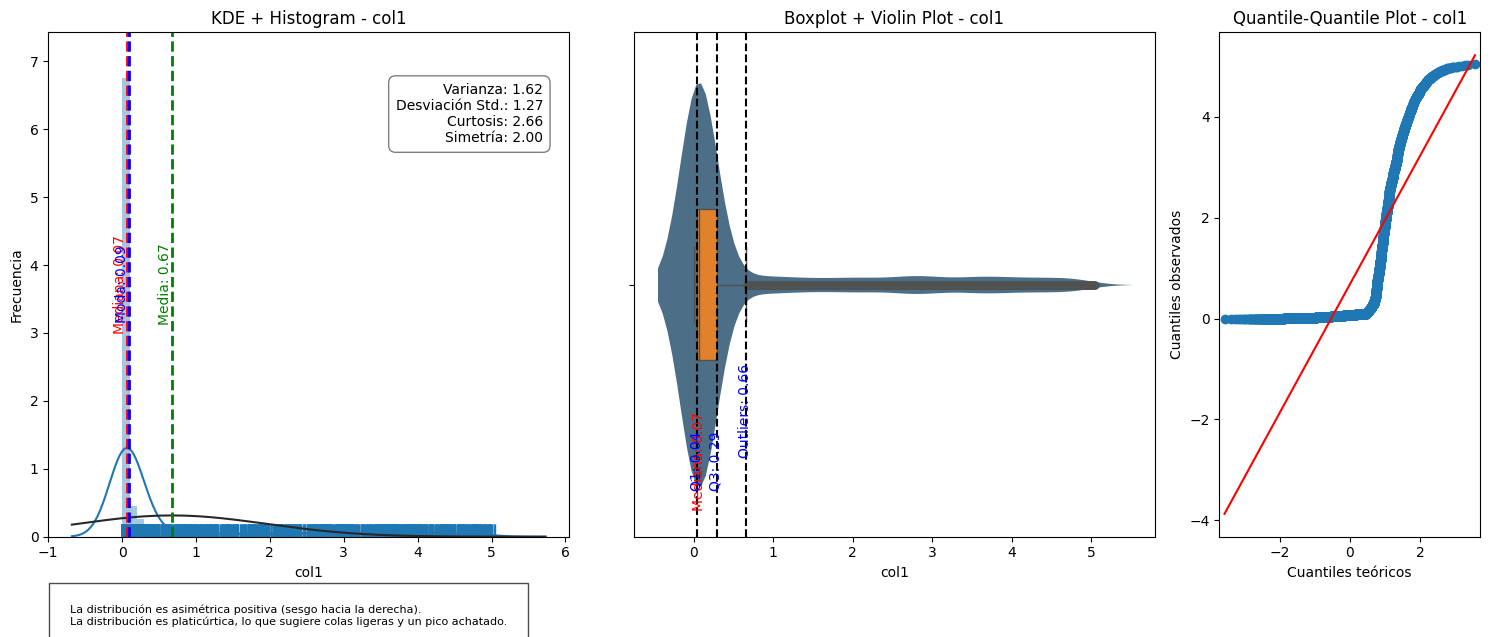

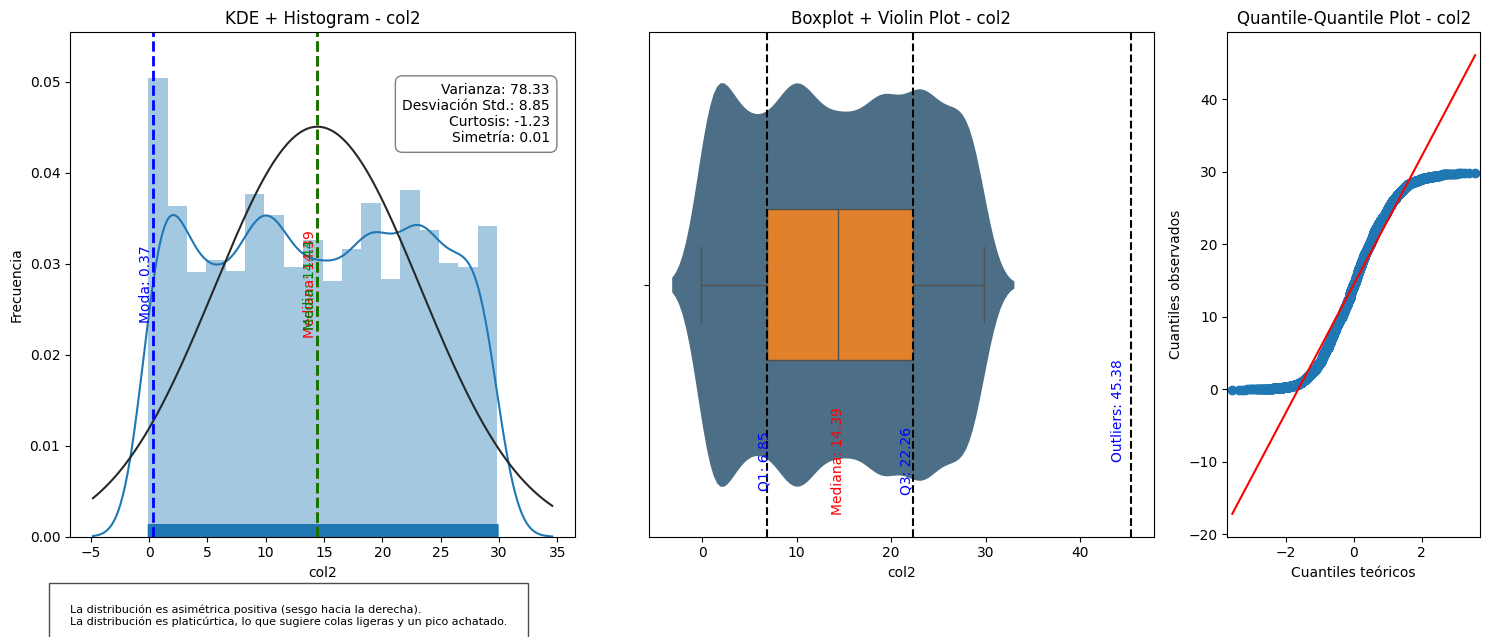

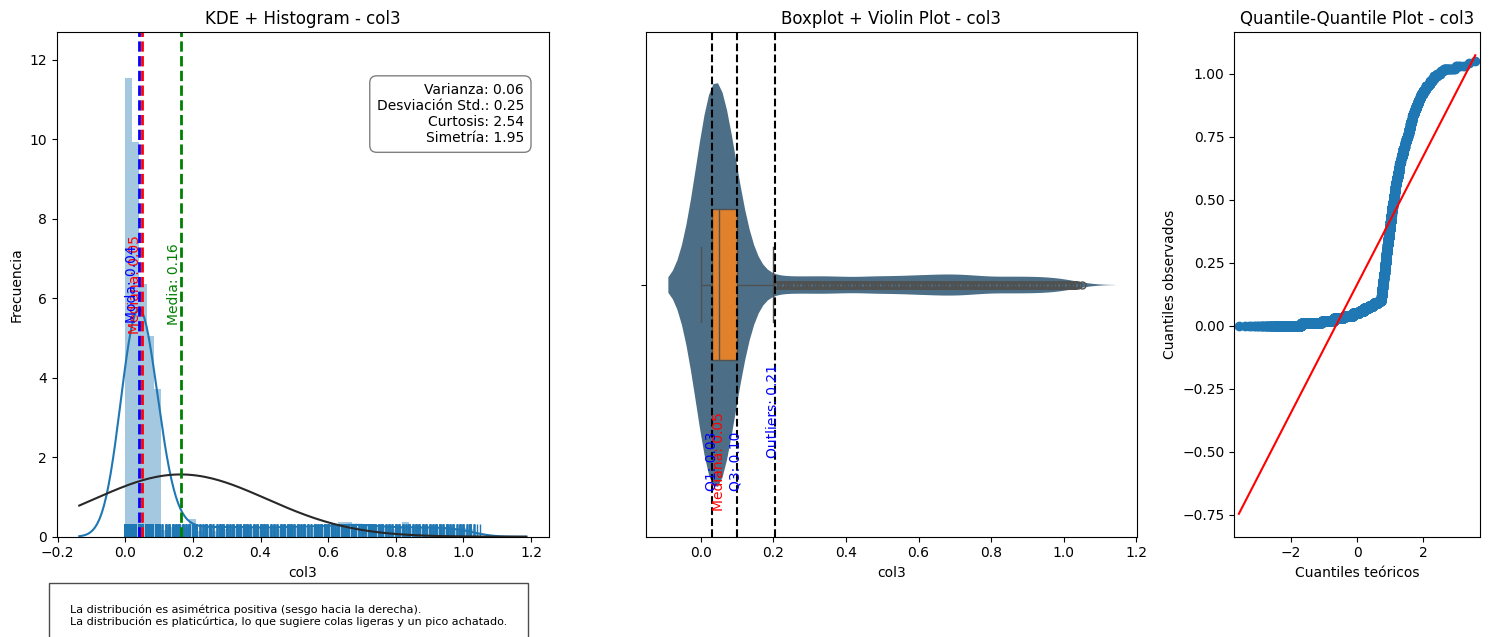

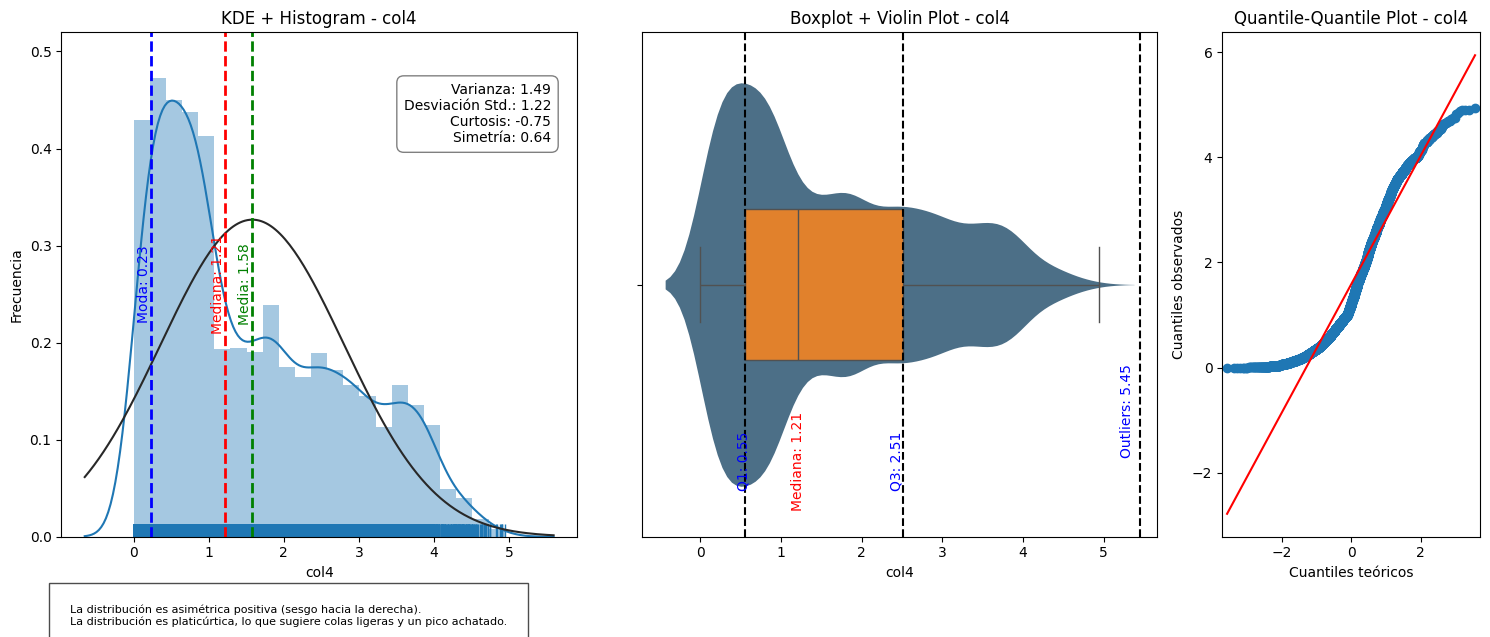

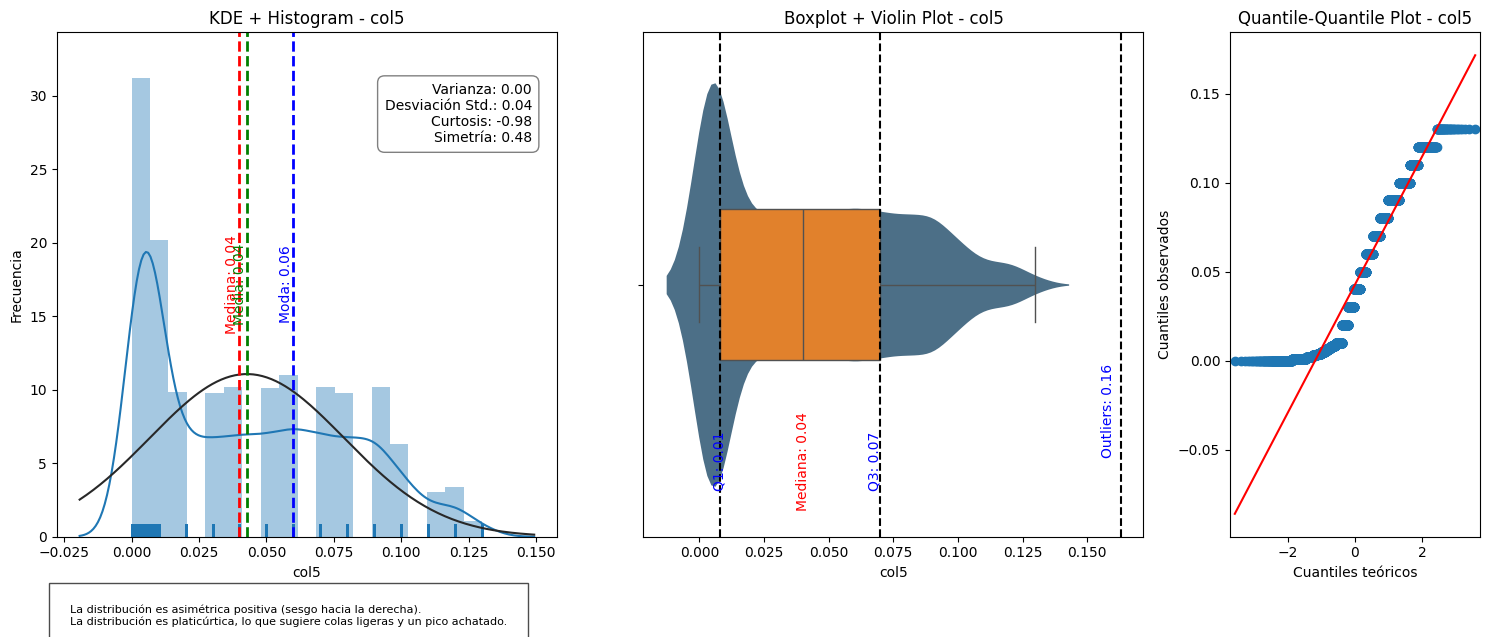

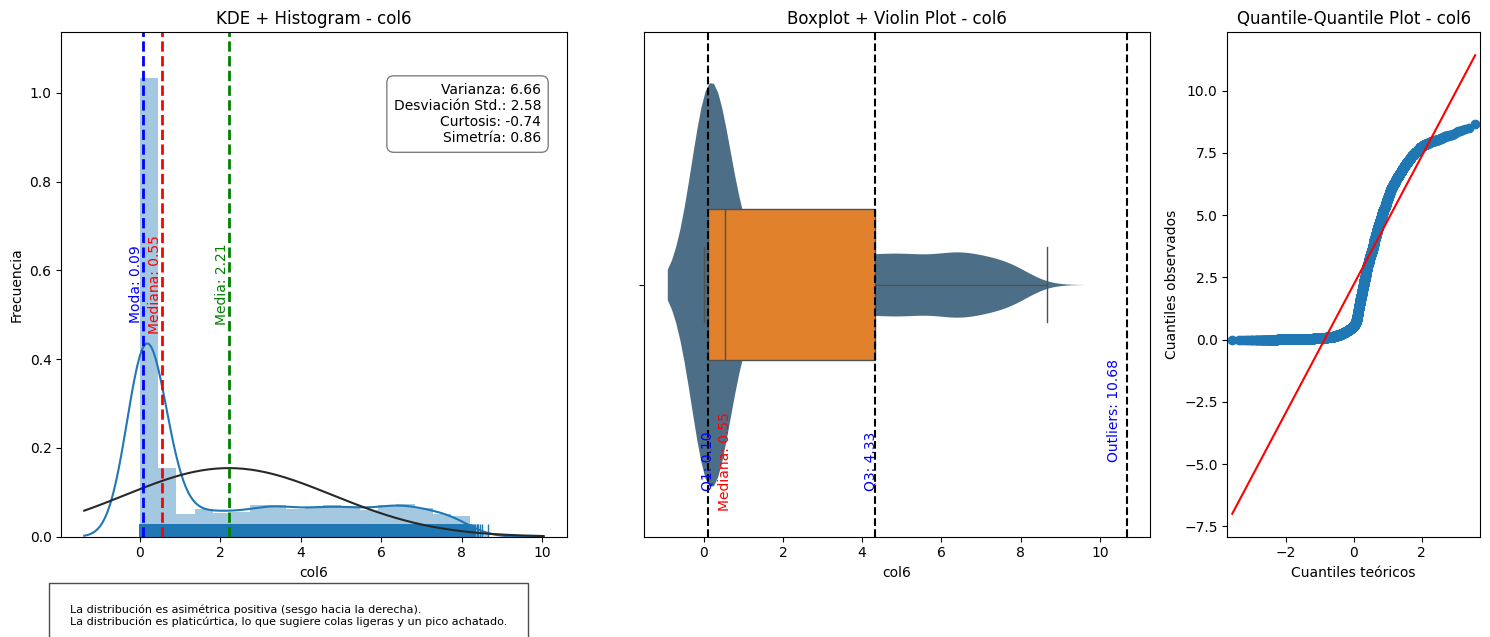

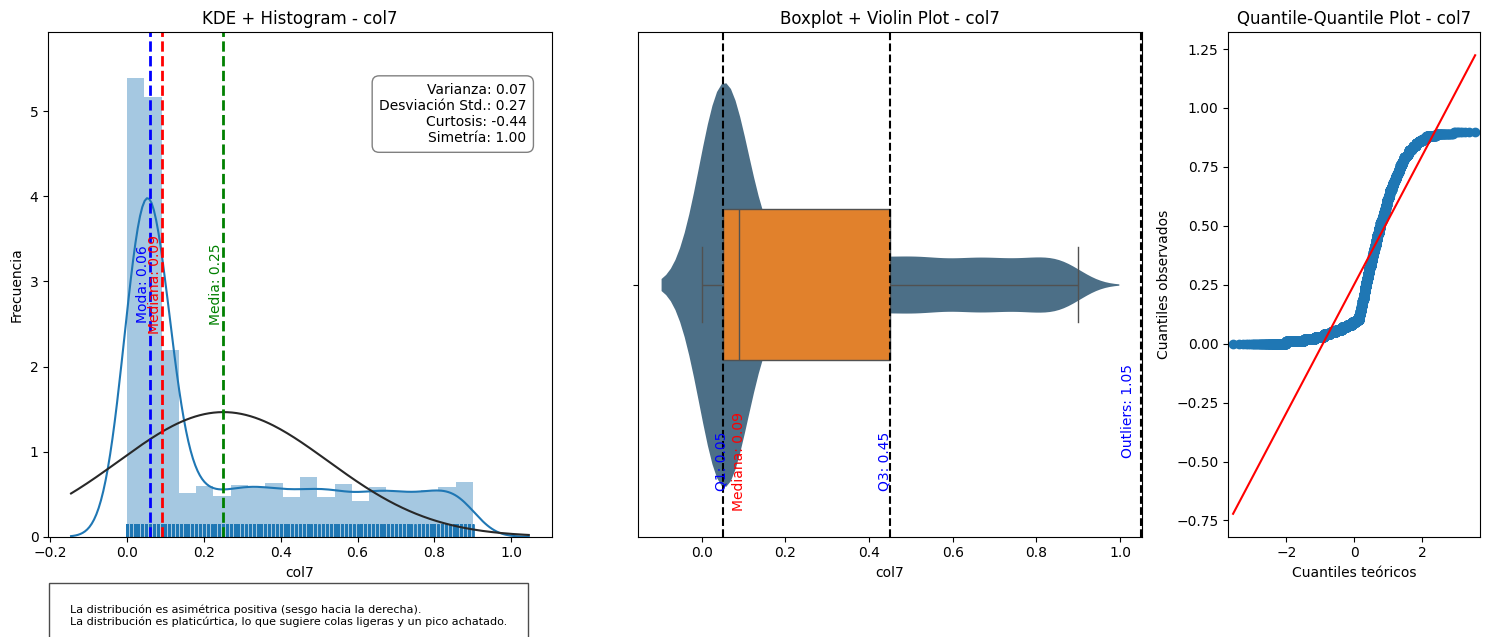

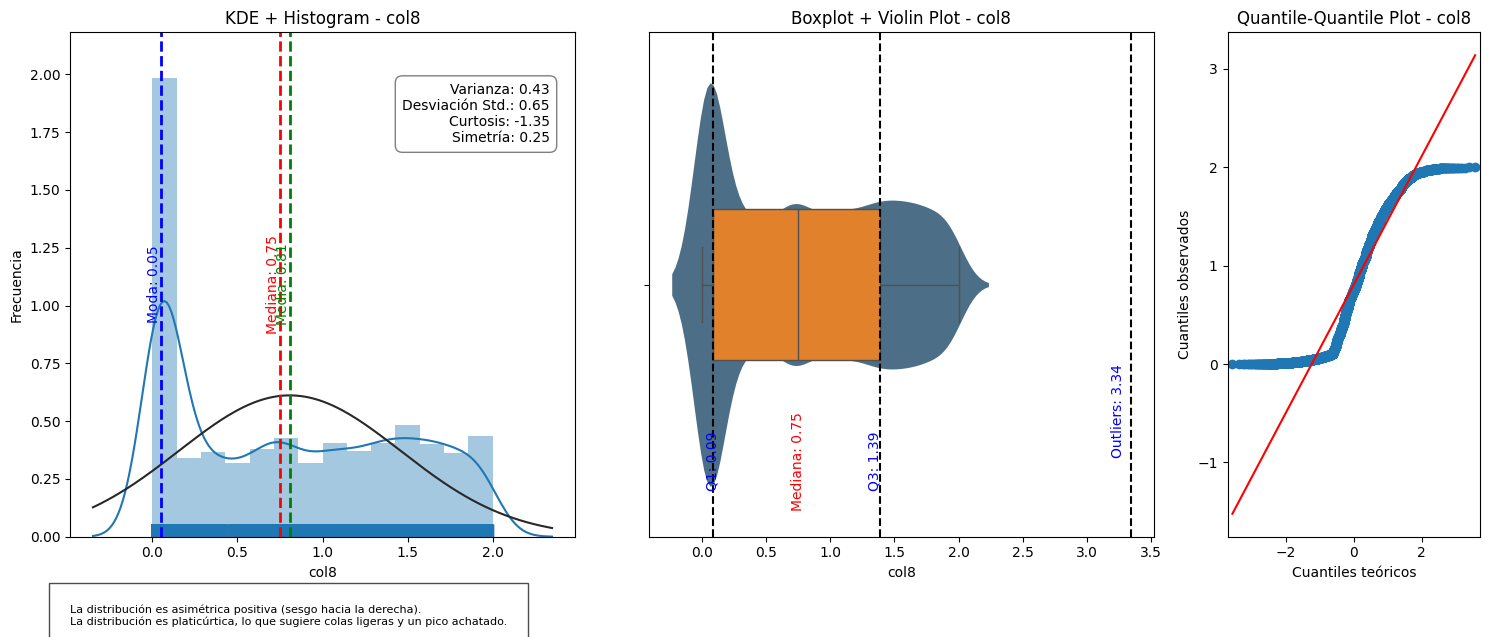

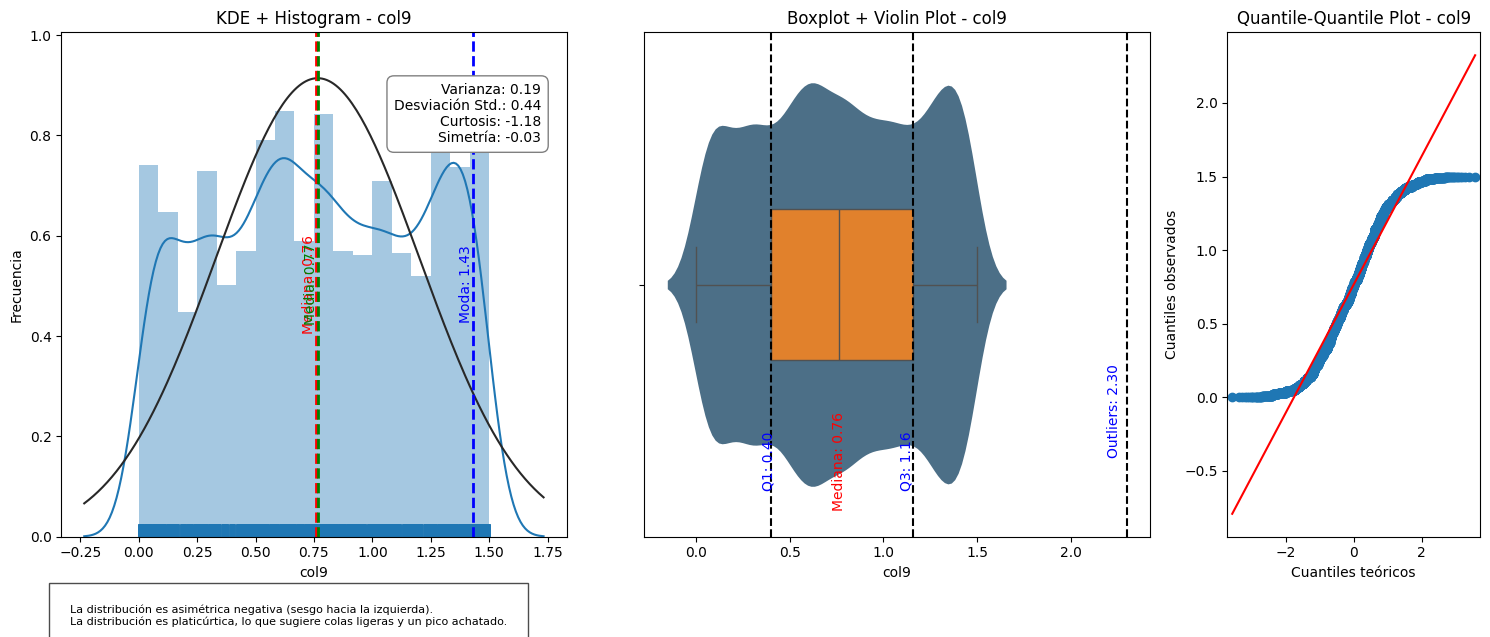

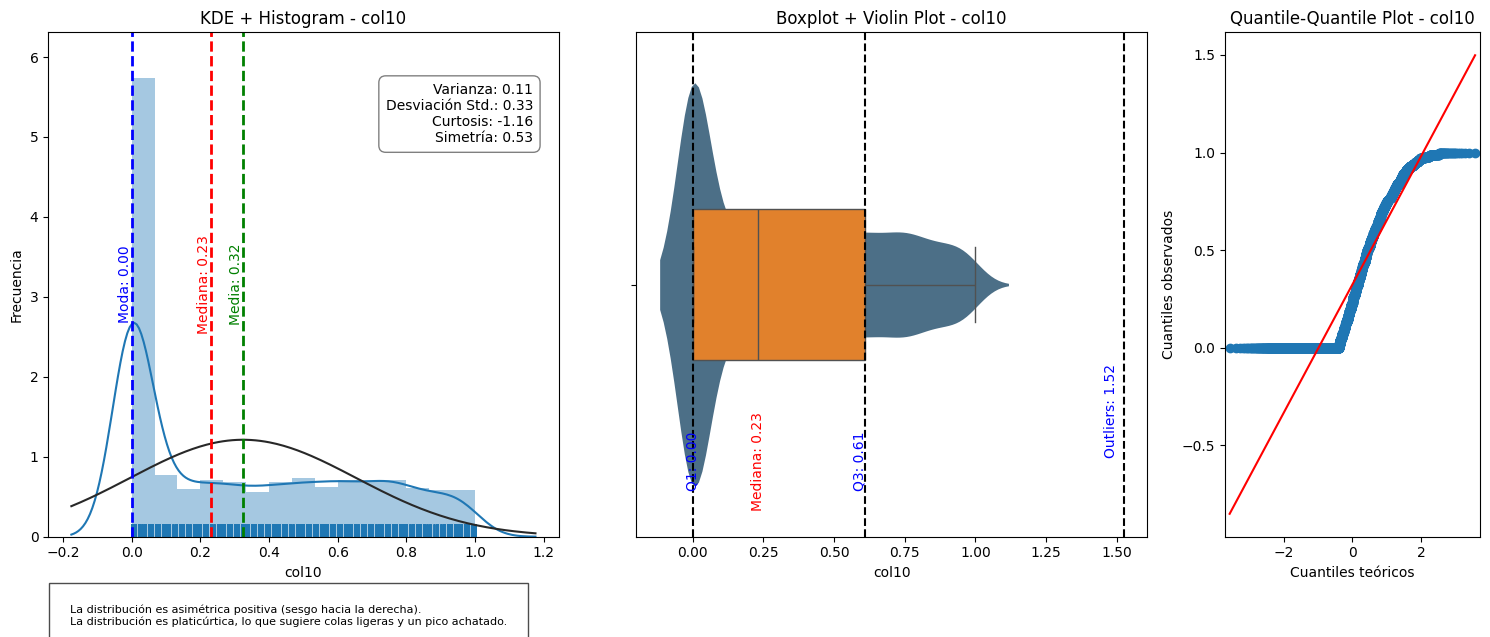

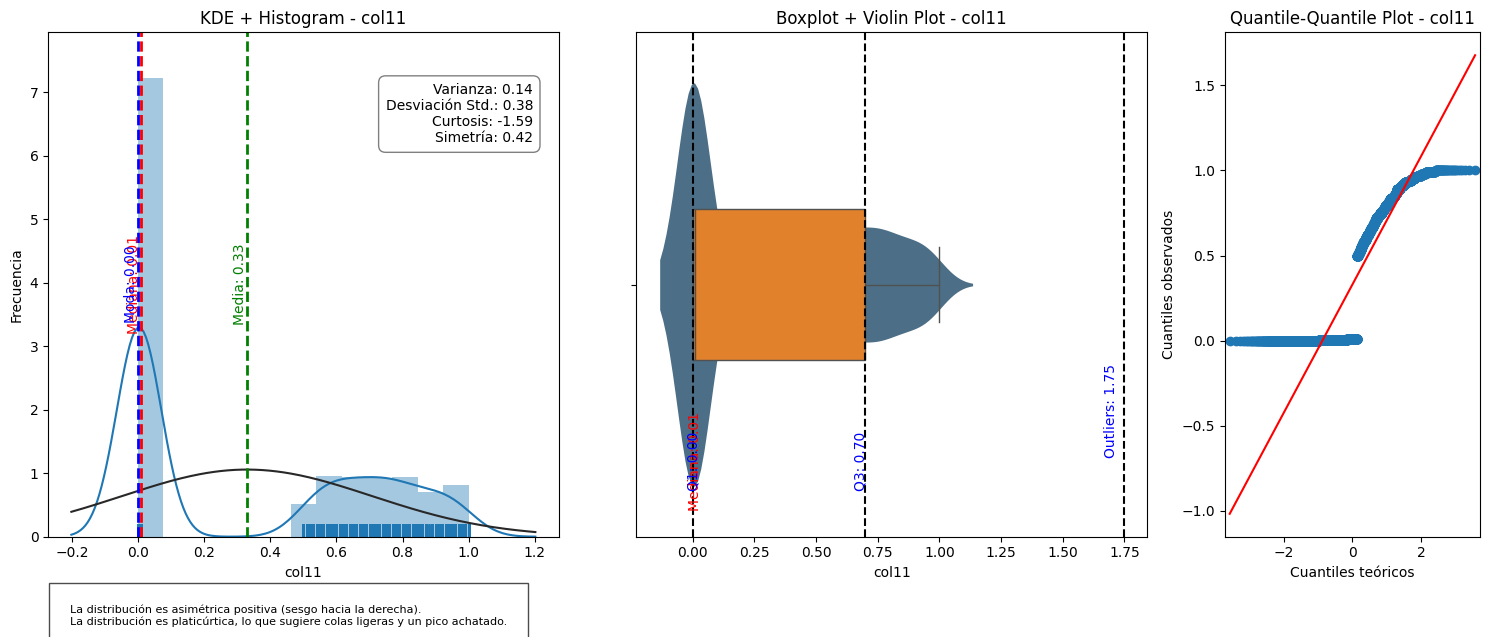

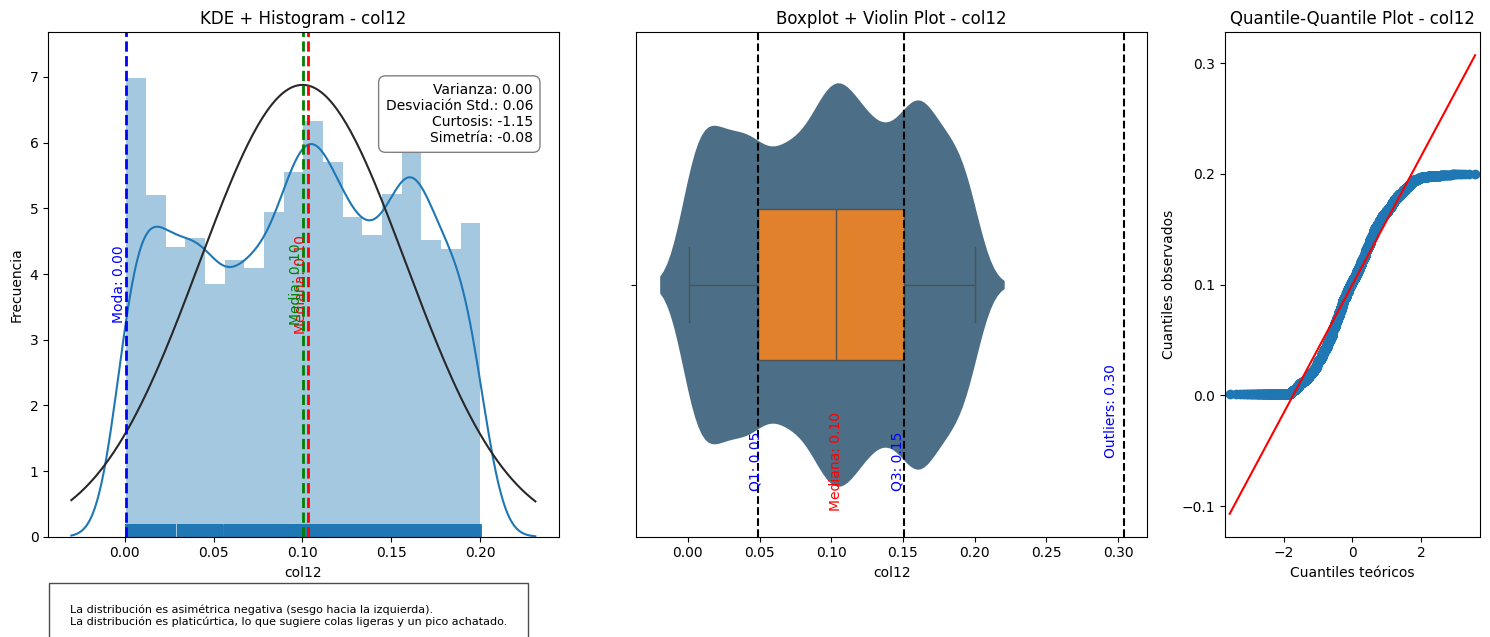

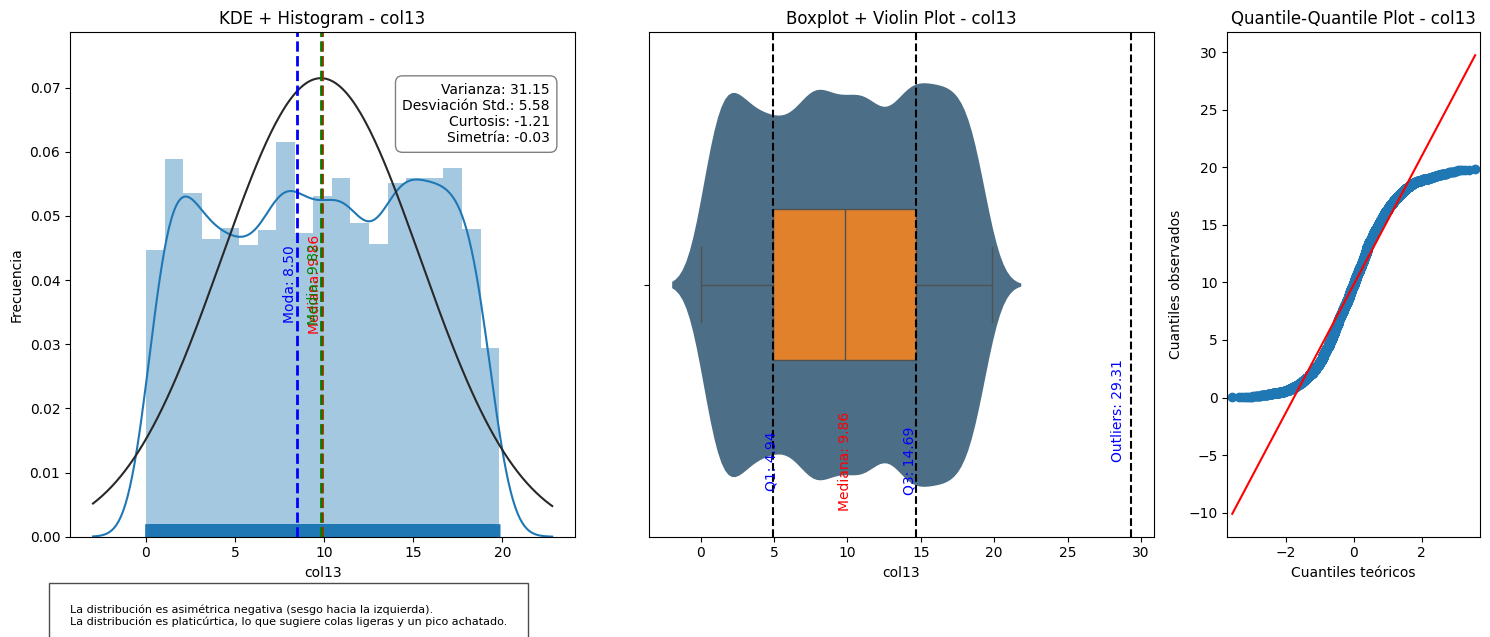

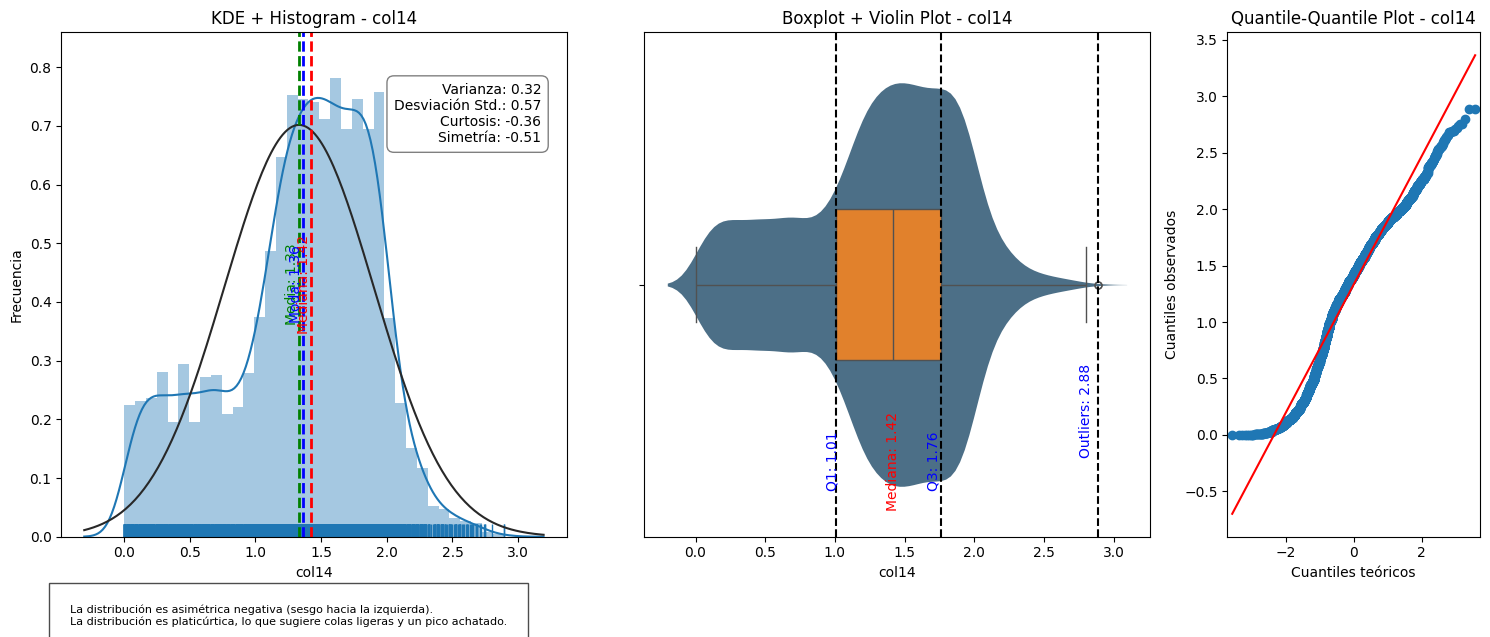

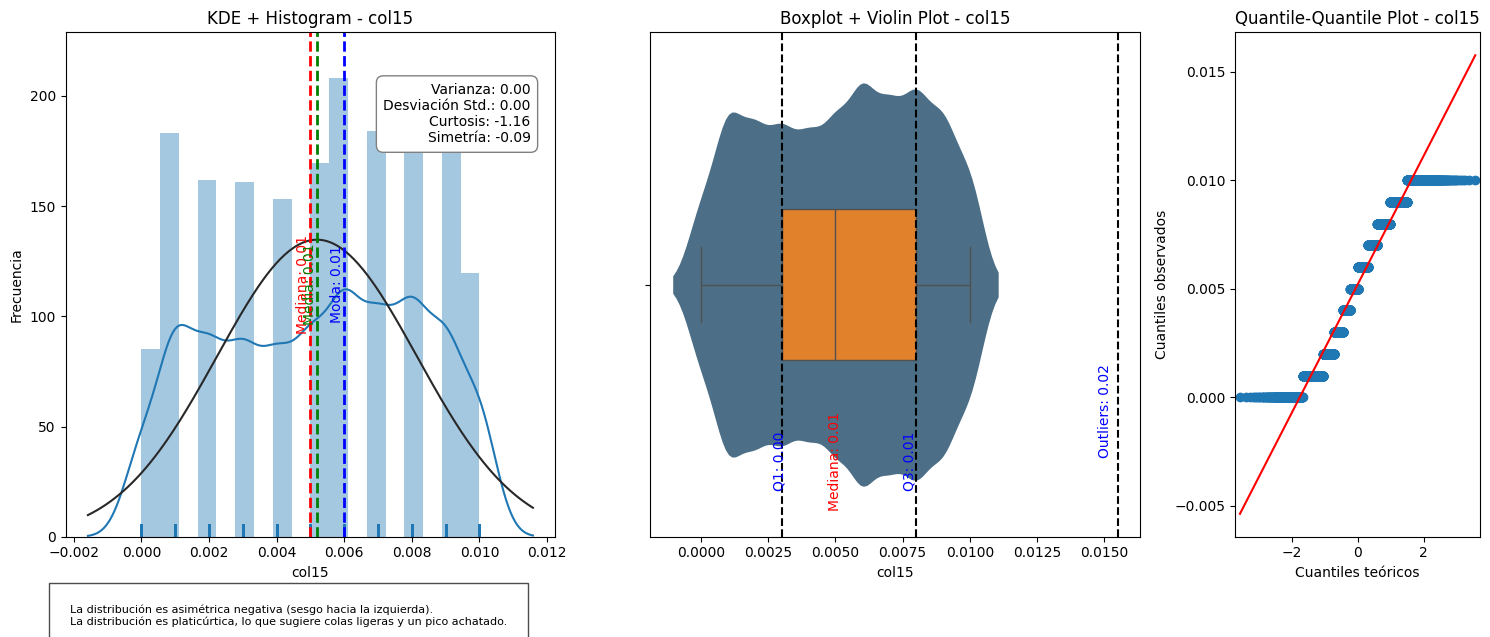

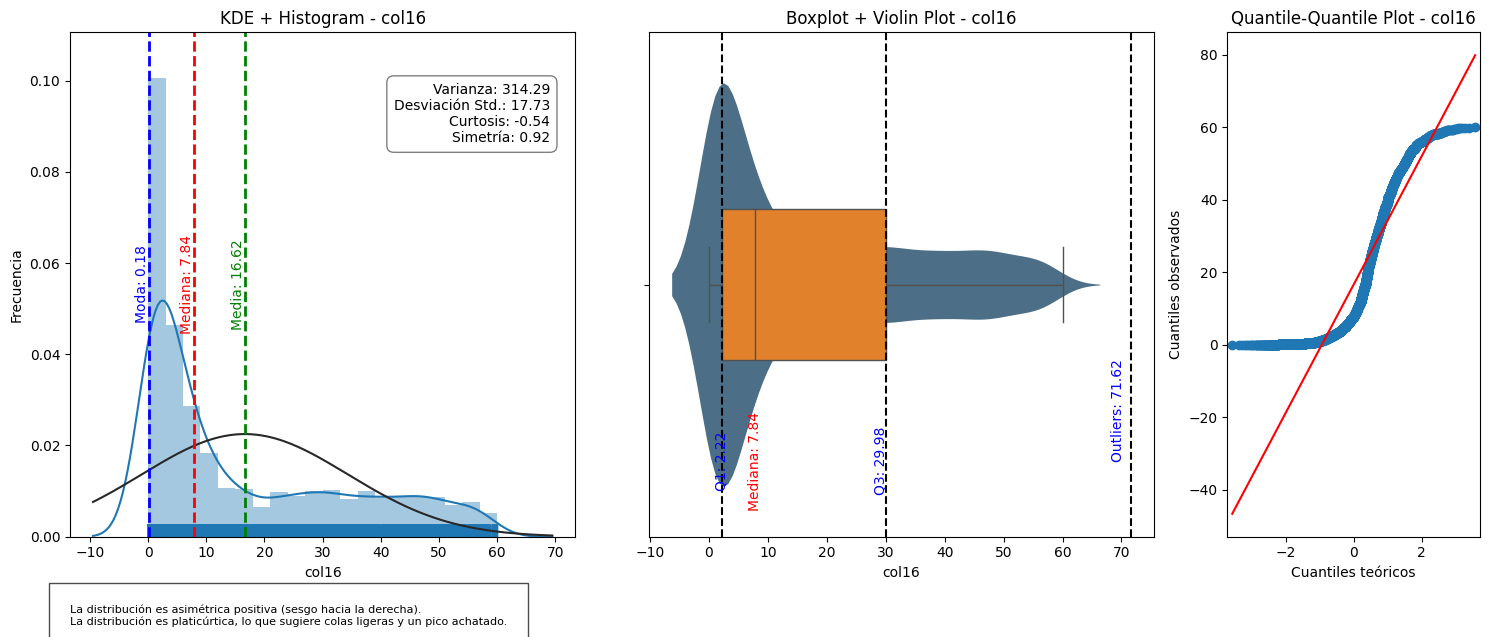

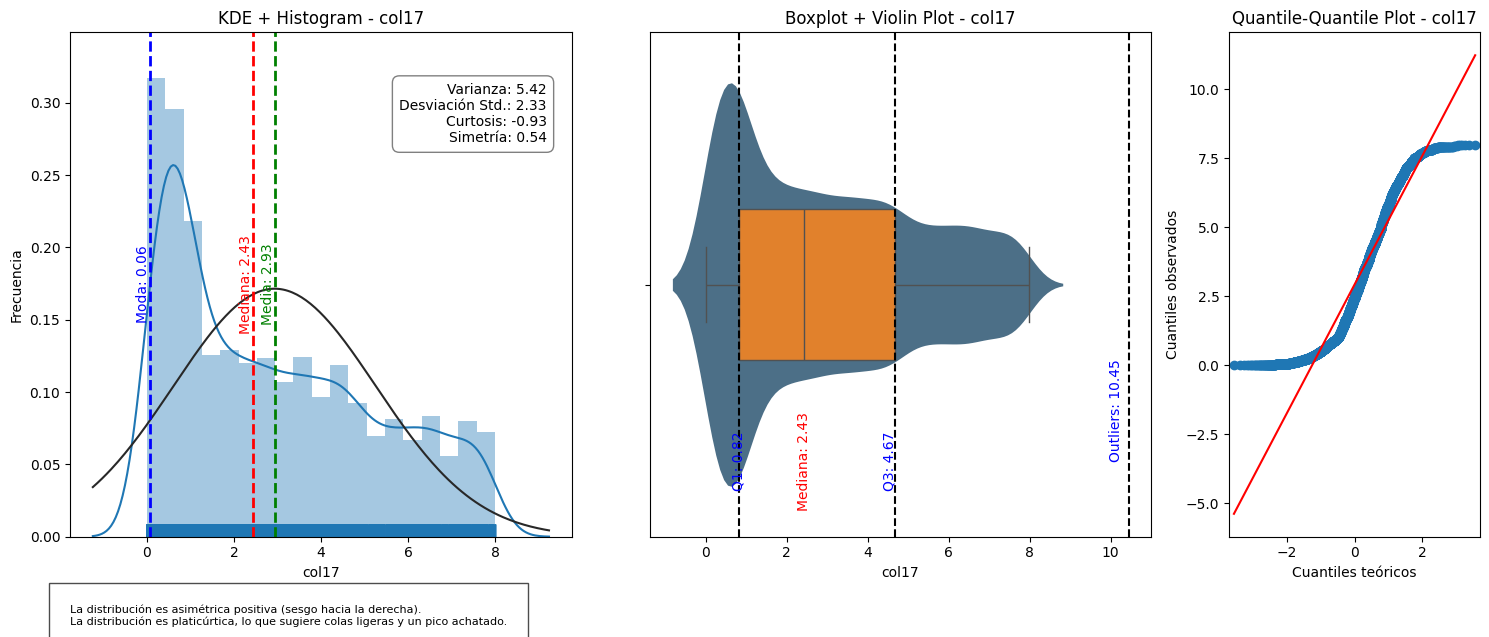

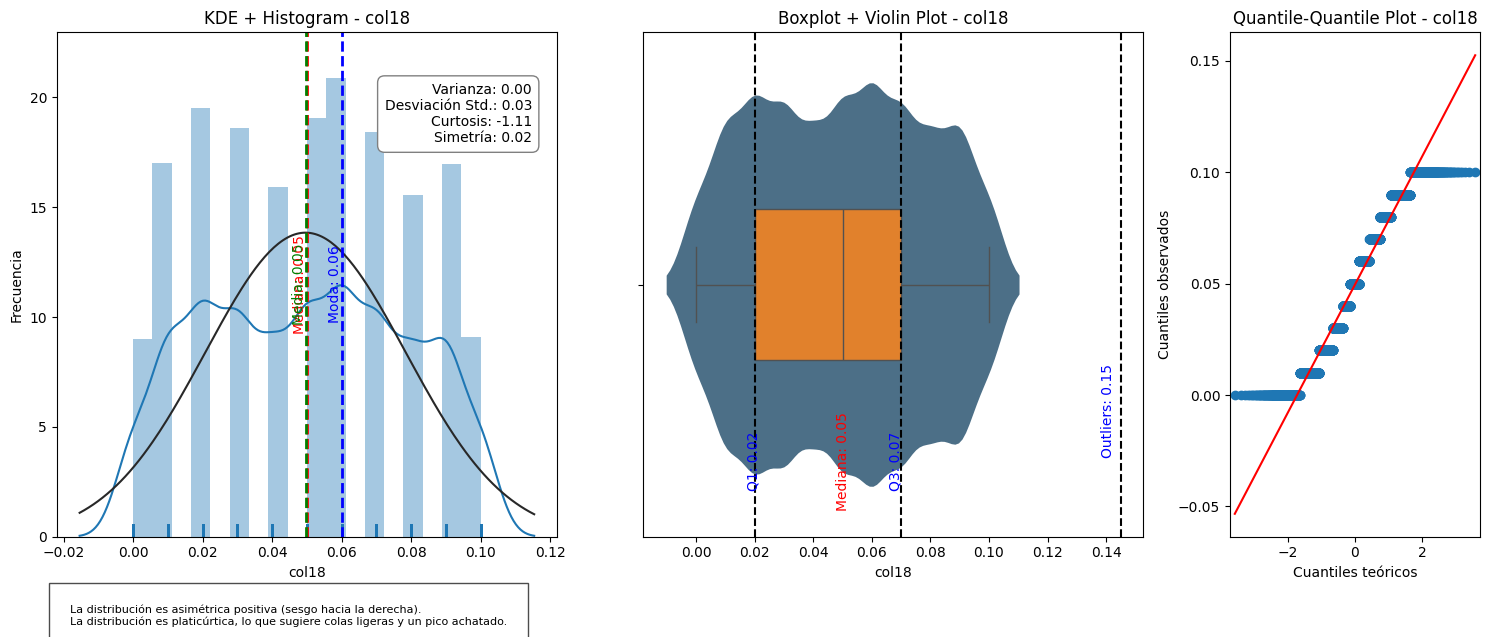

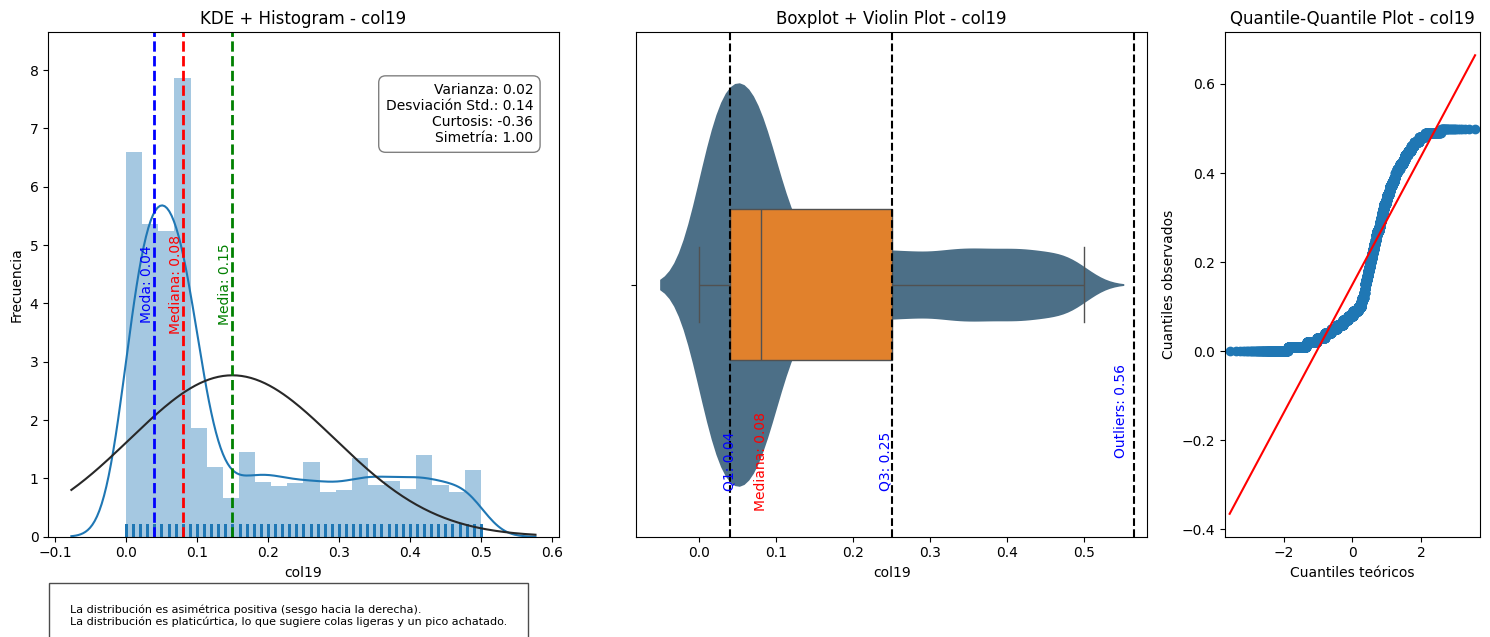

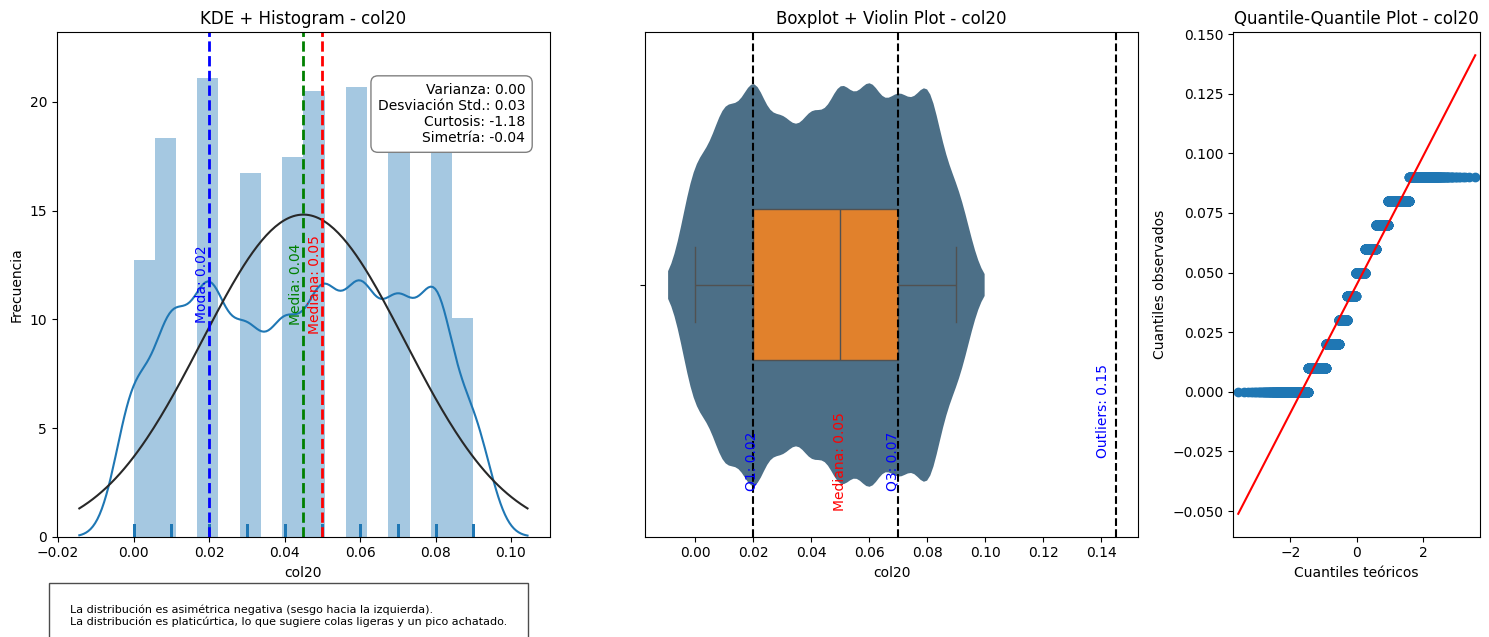

In [115]:
for col in numericas: 
    if col != target:
        plot_distribucion(df,col)

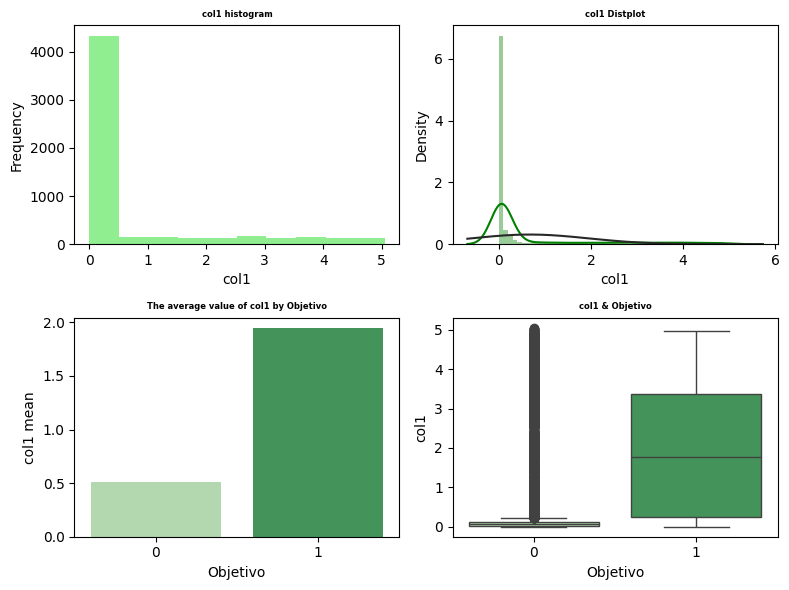

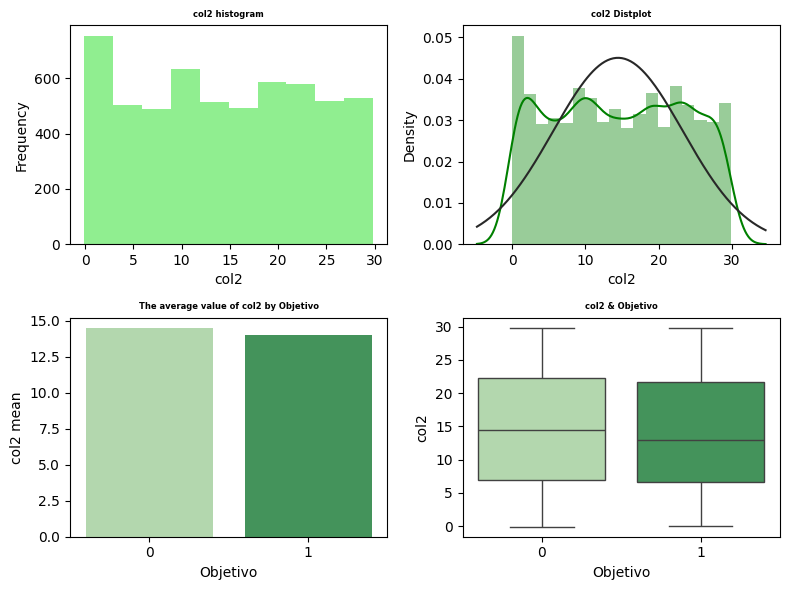

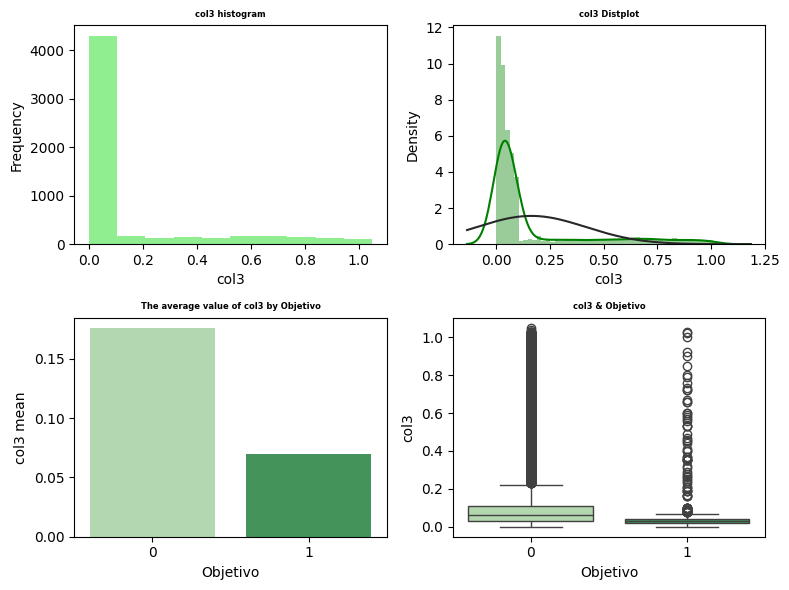

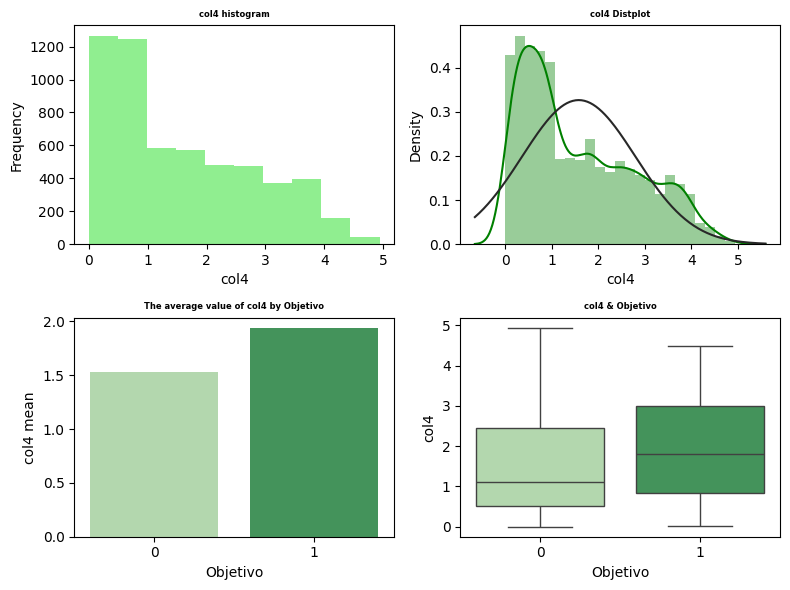

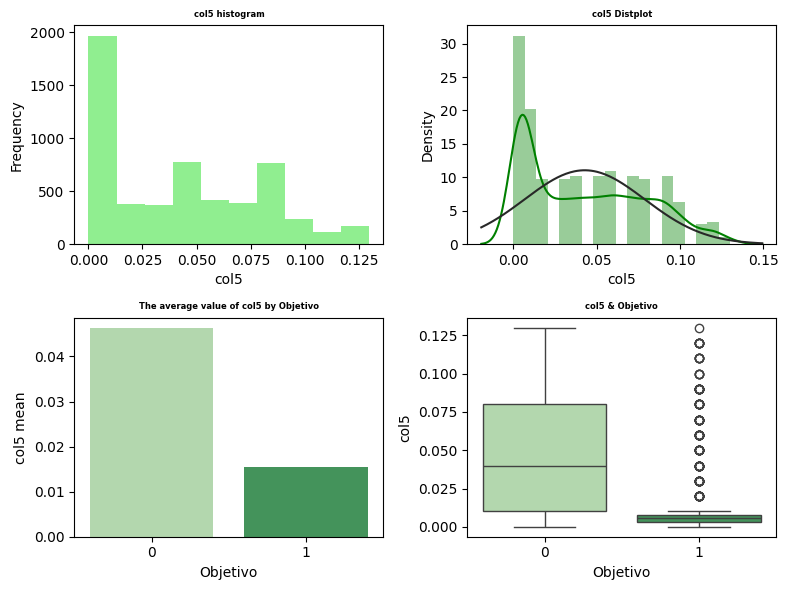

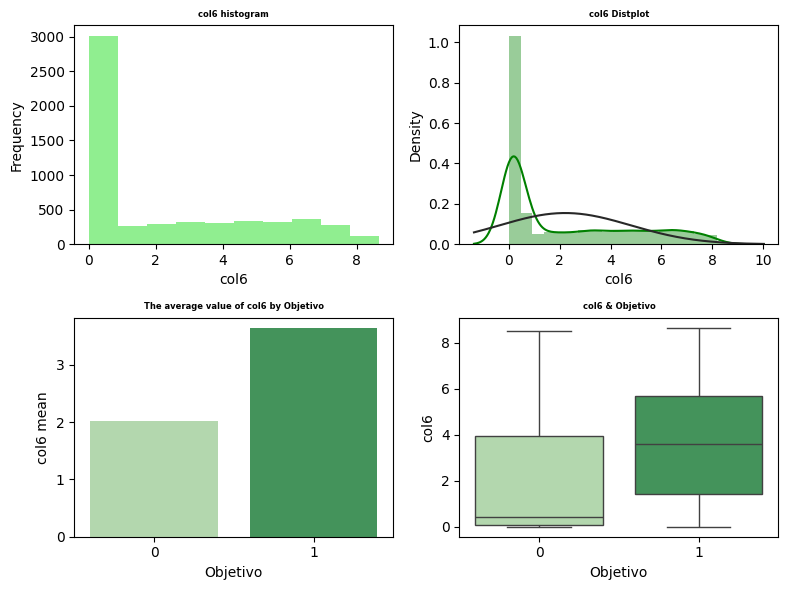

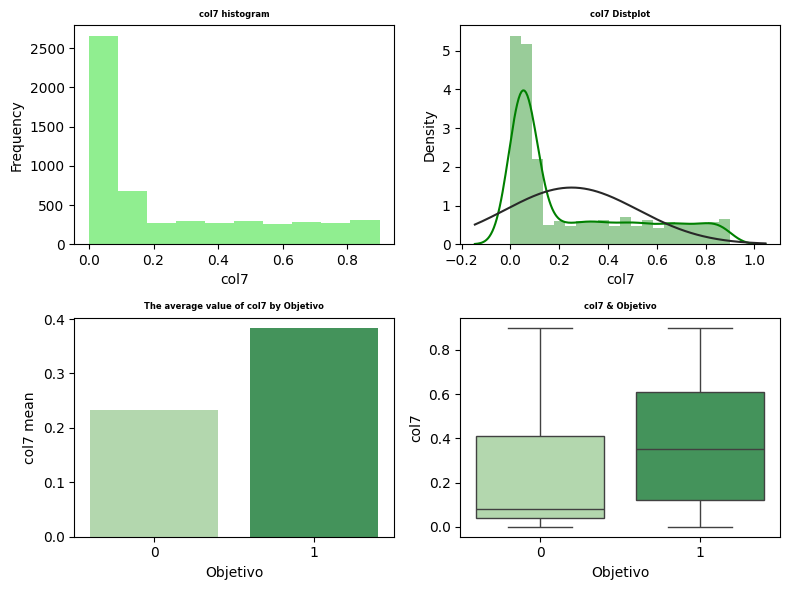

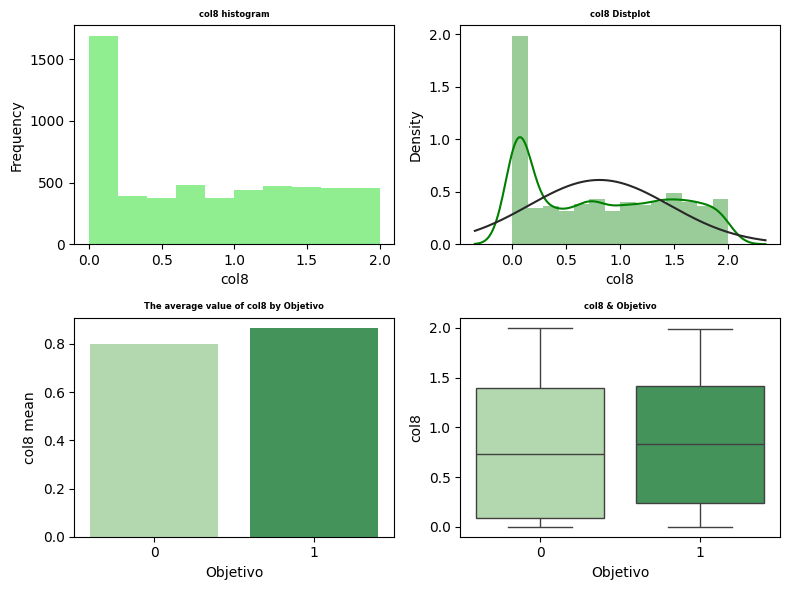

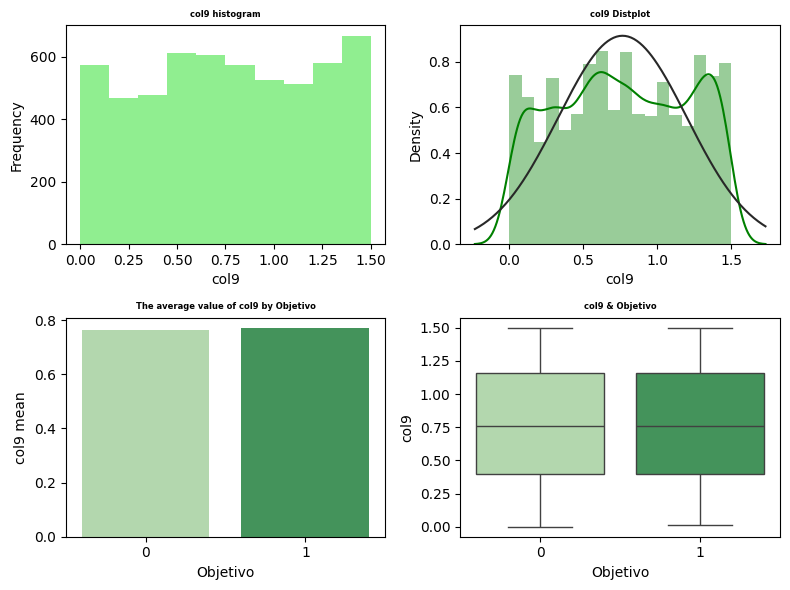

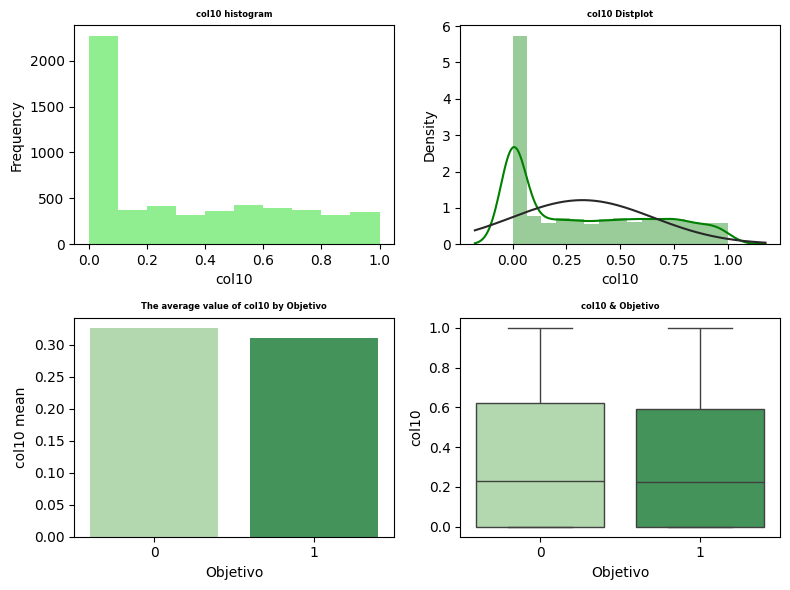

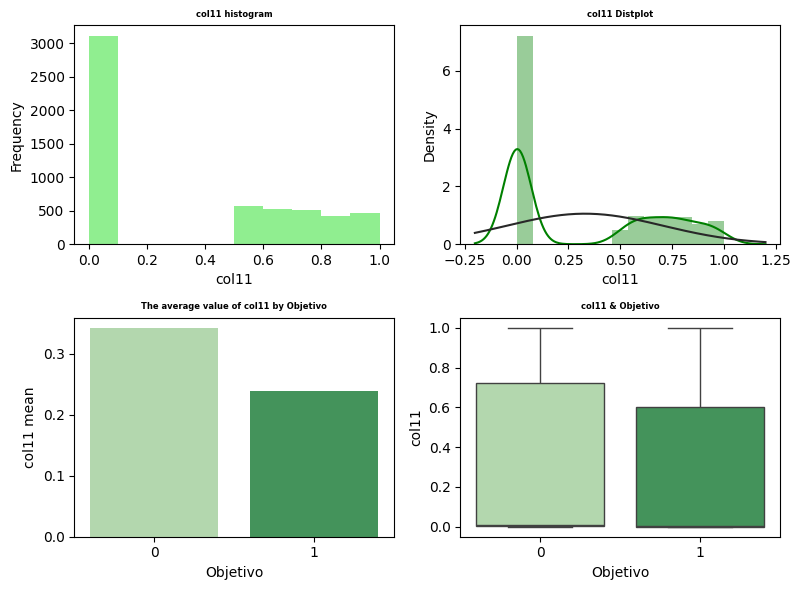

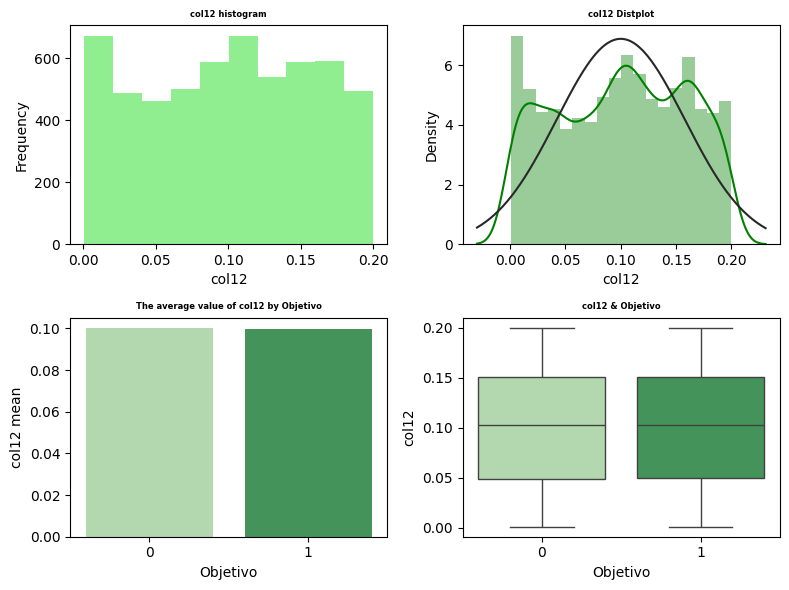

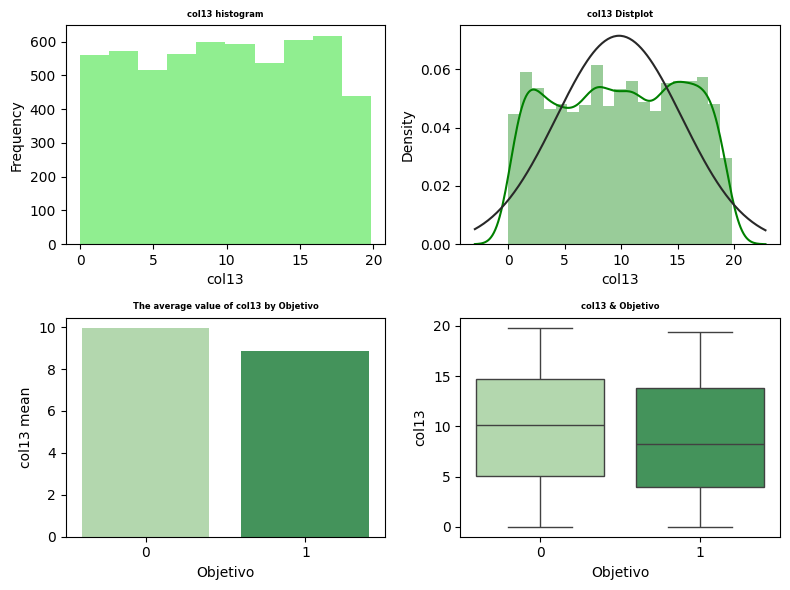

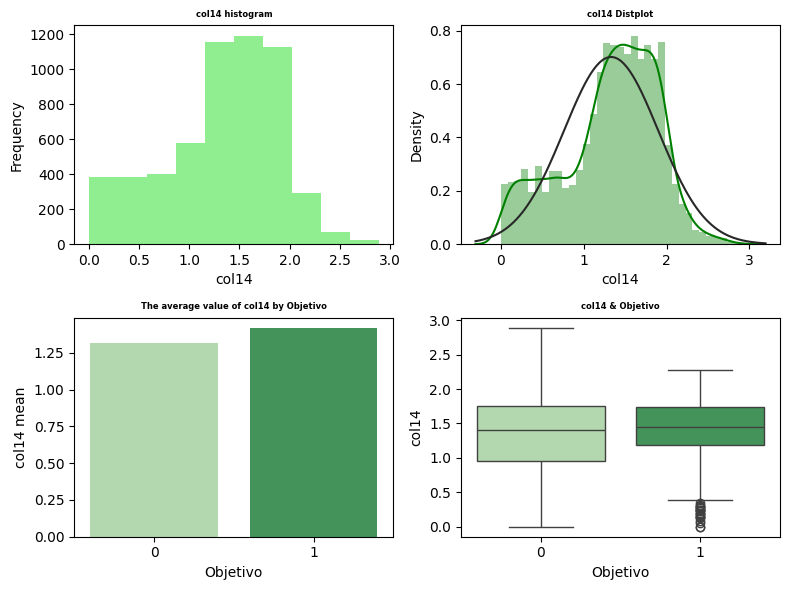

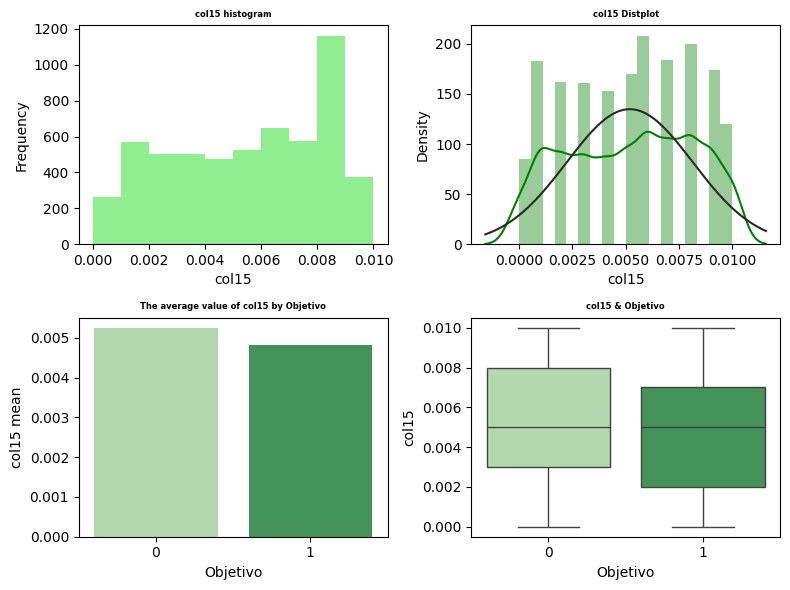

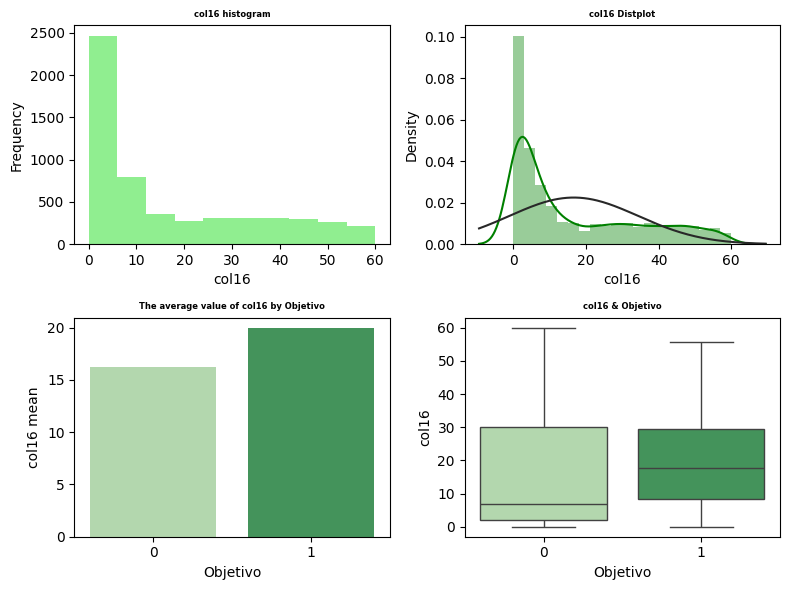

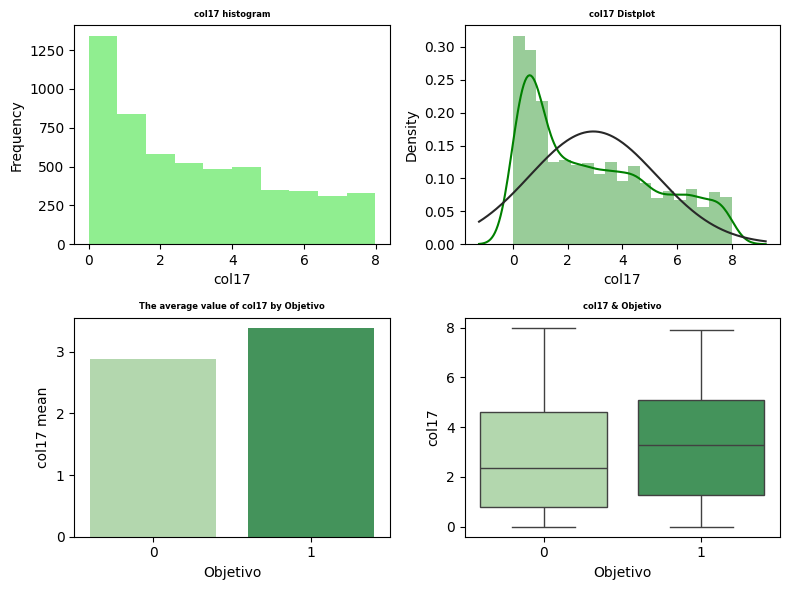

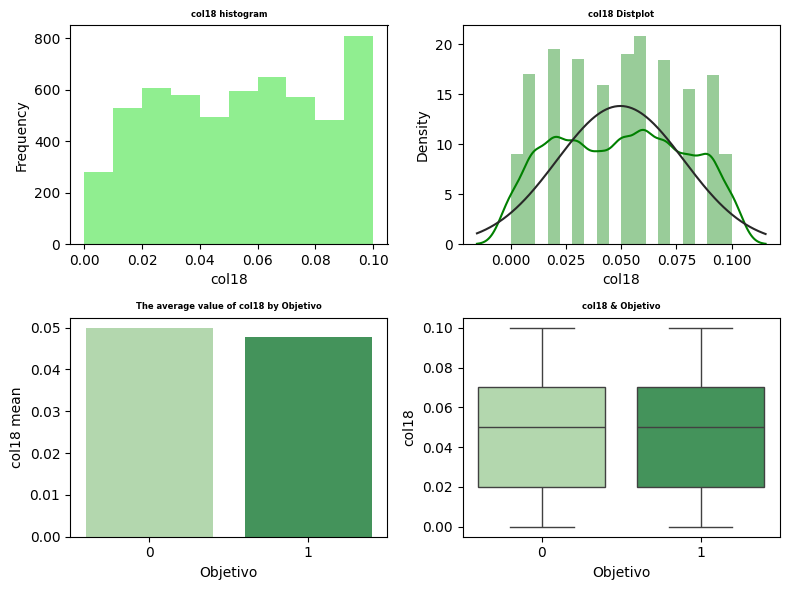

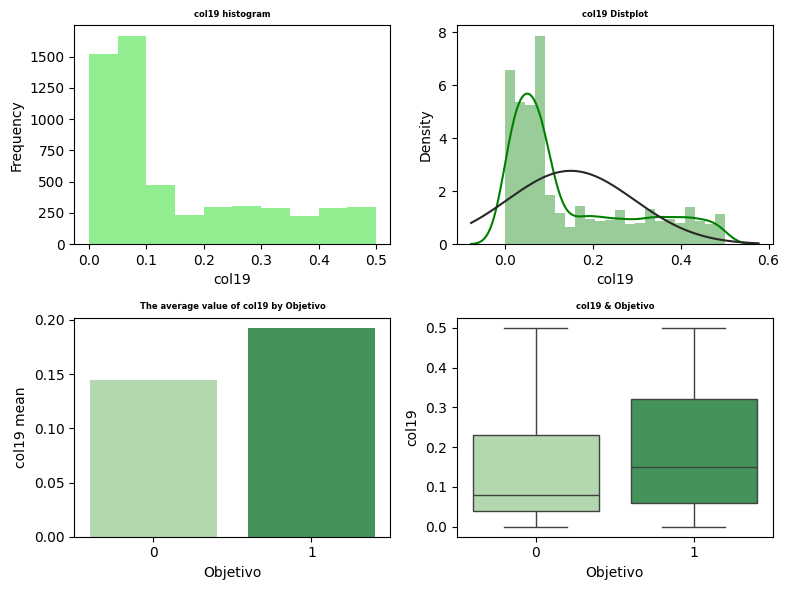

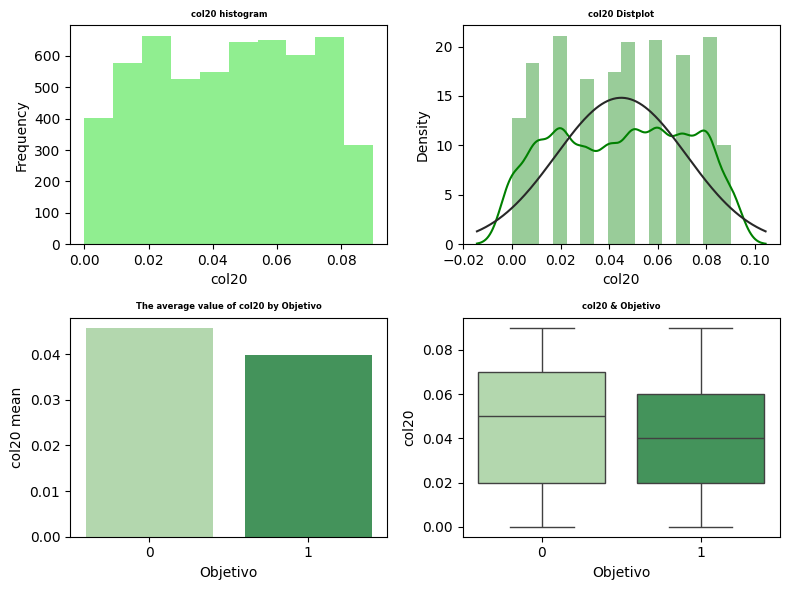

In [116]:
for col in numericas:
    if col != target:
        plot_analysis(df,target,col)


# 7. <a id='toc7_'></a>[Análisis bivariante](#toc0_)


interval columns not set, guessing: ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20']


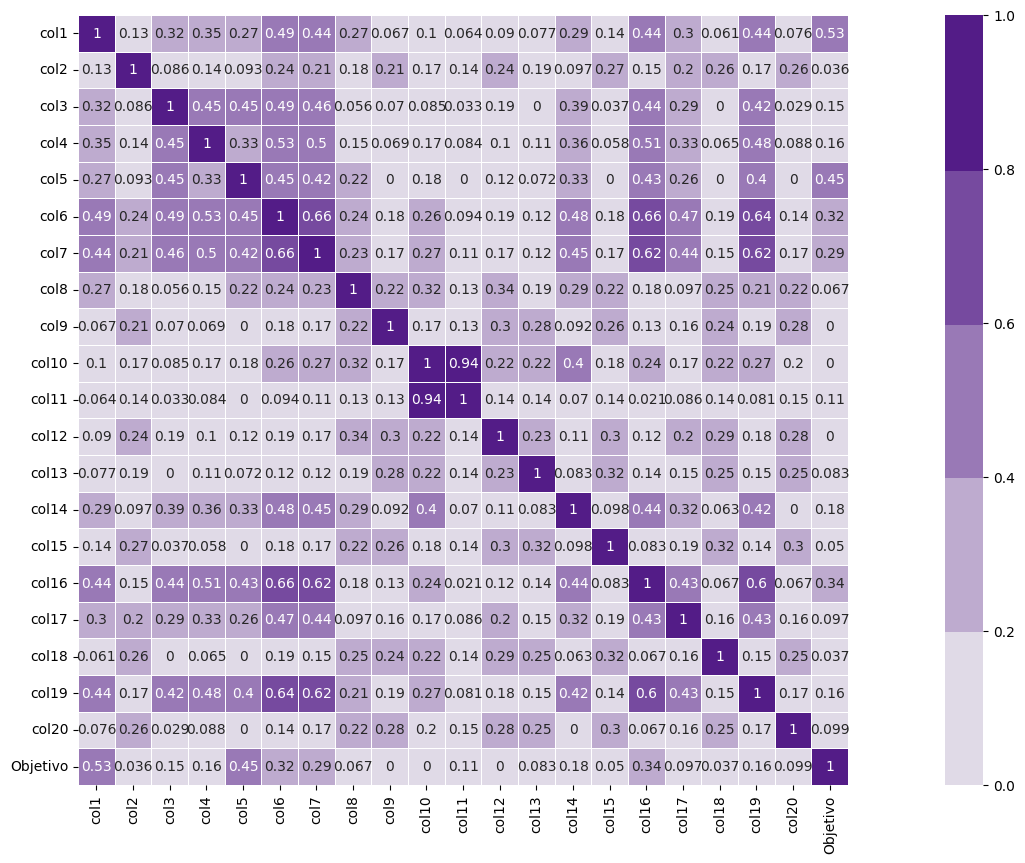

In [117]:
import phik
phik_matrix = df.phik_matrix()

plt.figure(figsize=(25,10))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

# 11. <a id='toc11_'></a>[Transformaciones (Encoding)](#toc0_)
    

In [118]:
def sqrt_transform(X):
    return np.sqrt(X)

def log_transform(X):
    return np.log1p(X)

In [119]:
classify_distributions(df, threshold=0.05)

{'col1': ('other', None),
 'col2': ('polimodal', 'yeo-johnson'),
 'col3': ('other', None),
 'col4': ('trimodal', 'yeo-johnson'),
 'col5': ('other', None),
 'col6': ('other', None),
 'col7': ('other', None),
 'col8': ('other', None),
 'col9': ('other', None),
 'col10': ('other', None),
 'col11': ('other', None),
 'col12': ('skewed_left', 'yeo-johnson'),
 'col13': ('skewed_left', 'yeo-johnson'),
 'col14': ('other', None),
 'col15': ('other', None),
 'col16': ('other', None),
 'col17': ('other', None),
 'col18': ('other', None),
 'col19': ('trimodal', 'yeo-johnson'),
 'col20': ('other', None)}

In [120]:
df.head()

col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  col11  \
ID                                                                         
4995  0.02 26.80  0.09  1.35  0.06  0.09  0.09  1.97  1.48   0.00   0.01   
1709  1.13  3.95  0.32  3.95  0.03  4.66  0.56  1.89  1.36   0.82   0.82   
7825  0.07  8.05  0.04  0.14  0.04  0.06  0.06  0.05  0.00   0.00   0.00   
6918  0.09 26.40  0.03  0.92  0.09  0.57  0.00  0.36  0.03   0.23   0.00   
5     0.94 14.47  0.03  2.88  0.00  0.80  0.43  1.38  0.11   0.67   0.67   

      col12  col13  col14  col15  col16  col17  col18  col19  col20 Objetivo  
ID                                                                            
4995   0.03   9.52   0.84   0.00   1.24   0.96   0.09   0.08   0.08        0  
1709   0.17  13.83   1.15   0.01  10.55   3.76   0.02   0.45   0.06        0  
7825   0.12   2.61   1.52   0.01   4.13   0.27   0.03   0.03   0.01        0  
6918   0.06   5.22   1.96   0.00  11.32   0.25   0.09   0.01   0.05        0  
5      0.14   9.75   1.89   0.01  27.17   5.42   0.08   0.19   0.02        1

In [121]:
# target no necesita transformación
y = df[target]

Guardo df, df_train y df_test antes de transformarlas

In [122]:
# Save df as pickle
df.to_pickle(PATH.PROCESSED + 'df.pkl')
df_train.to_pickle(PATH.PROCESSED + 'df_train.pkl')
df_test.to_pickle(PATH.PROCESSED + 'df_test.pkl')

In [123]:
# Load df as pickle
df = pd.read_pickle(PATH.PROCESSED + 'df.pkl')
df_train = pd.read_pickle(PATH.PROCESSED + 'df_train.pkl')
df_test = pd.read_pickle(PATH.PROCESSED + 'df_test.pkl')

Pipeline para transformar las columnas. Para ver la significancia, lo tengo que pasar a numéricas y ya veré si posteriormente elimino columnas antes de quitar outliners.

In [124]:
dist_class = classify_distributions(df, threshold=0.05)

In [125]:
list(df.select_dtypes(include=['number']).columns)


['col1',
 'col2',
 'col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20']

In [126]:
def Encoder(df, target_col, threshold=0.05):
    if target_col not in df.columns:
        X = df.copy()
    else:
        X = df.drop(columns=[target_col])

    dist_class = classify_distributions(X, threshold)
    
    
    numeric_columns_to_transform = [col for col, (dist,model) in dist_class.items()]
    untouched_columns = list(set(X.columns)  - set(numeric_columns_to_transform))

    numeric_transformers = [
        ('sqrt_transform', FunctionTransformer(sqrt_transform), [col for col, (dist, _) in dist_class.items() if dist == 'positive_increasing']),
        ('log_transform', FunctionTransformer(log_transform), [col for col, (dist, _) in dist_class.items() if dist == 'positive_decreasing']),
        ('yeojohnson_transform', PowerTransformer(method='yeo-johnson'), [col for col, (dist, _) in dist_class.items() if dist not in ['positive_increasing', 'positive_decreasing']]),
        ('untouched', 'passthrough', untouched_columns)
    ]

    numeric_pipeline = Pipeline([
        ('transformation', ColumnTransformer(
            transformers=numeric_transformers,
            remainder='passthrough')
        ),
        ('scaler', StandardScaler())
    ])

    
    preprocessor = numeric_pipeline

    final_pipeline = Pipeline([
        ('preprocessor', preprocessor)
    ])

    required_columns = set([col for col, _ in dist_class.items()])
    if not required_columns.issubset(X.columns):
        missing_columns = required_columns - set(X.columns)
        raise ValueError(f"Missing columns: {missing_columns}")

    X_trans = final_pipeline.fit_transform(X)
    transformed_columns = []


    # Obtener columnas transformadas de variables numéricas
    numeric_transformer = final_pipeline.named_steps['preprocessor'].named_steps['transformation']
    numeric_columns_transformed = numeric_transformer.get_feature_names_out()
    transformed_columns.extend(numeric_columns_transformed)


    # Obtener columnas restantes
    remaining_columns = list(X.columns.difference( numeric_columns_to_transform))
    transformed_columns.extend(remaining_columns)
    transformed_columns=list(pd.DataFrame(transformed_columns)[0].explode().dropna())
    
    return pd.DataFrame(X_trans, columns=transformed_columns)


    


In [127]:
X_trans=Encoder(df, target, threshold=0.05)


In [128]:
X_test=Encoder(df_test, target, threshold=0.05)
#save X_test as pickle
X_test.to_pickle(PATH.PROCESSED + 'X_test.pkl')

# 12. <a id='toc12_'></a>[División train y test](#toc0_)
   

In [129]:
from pyod.models.ecod import ECOD

In [130]:
def outlier_split(X_trans,y, test_size=0.2):
    Xout=X_trans.copy()
    outclf = ECOD(n_jobs=-1)
    outclf.fit(Xout)
    mask = outclf.labels_  # binary labels (0: inliers, 1: outliers)
    X_trans_out=X_trans[mask==0]
    X_trans_out=pd.DataFrame(data=X_trans_out, columns=X_trans.columns)
    y_out=[y for  i,y in enumerate(y) if mask[i]==0]
    X_train, X_val, y_train, y_val = train_test_split(X_trans_out, y_out, test_size=test_size, random_state=123)
    return X_train, X_val, y_train, y_val

In [131]:
X_train, X_val, y_train, y_val=outlier_split(X_trans,y, test_size=0.2)

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    5.3s remaining:   48.3s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    5.4s finished


In [132]:
trainval=['X_train', 'X_val','y_train', 'y_val']
for data in trainval:
    if  isinstance(data,pd.DataFrame):
        globals()[data]=reduce_memory_usage(globals()[data])
    else:
        globals()[data]=reduce_memory_usage(pd.DataFrame((globals()[data])))

Mem. usage decreased to 0.18 Mb (71.4% reduction)
Mem. usage decreased to 0.05 Mb (71.4% reduction)
Mem. usage decreased to 0.00 Mb (87.1% reduction)
Mem. usage decreased to 0.00 Mb (86.1% reduction)


# 13. <a id='toc13_'></a>[Feature Reduction](#toc0_)


In [133]:
import random

def generate_random_numbers(dataframe_length, num_numbers=2000):
    return [random.randint(0, dataframe_length - 1) for _ in range(num_numbers)]


Por cuestión de tiempo de computación  no hago análsiis de todo el DataFrame. En su defecto, hago un random sample mayor del 10% de la muestra y lo tomo como representativo.

In [134]:
generate_random_numbers=generate_random_numbers(len(X_train),num_numbers=int(len(X_train)*0.1))
X_train_=X_train.iloc[generate_random_numbers]
y_train_=y_train.iloc[generate_random_numbers]

  0%|          | 0/100 [00:00<?, ?it/s]

7 attributes confirmed important: ['yeojohnson_transform__col7', 'yeojohnson_transform__col1', 'yeojohnson_transform__col9', 'yeojohnson_transform__col6', 'yeojohnson_transform__col19', 'yeojohnson_transform__col5', 'yeojohnson_transform__col3']
12 attributes confirmed unimportant: ['yeojohnson_transform__col17', 'yeojohnson_transform__col11', 'yeojohnson_transform__col2', 'yeojohnson_transform__col8', 'yeojohnson_transform__col15', 'yeojohnson_transform__col13', 'yeojohnson_transform__col20', 'yeojohnson_transform__col12', 'yeojohnson_transform__col10', 'yeojohnson_transform__col14', 'yeojohnson_transform__col18', 'yeojohnson_transform__col16']
1 tentative attributes remains: ['yeojohnson_transform__col4']
0 tentative features are now accepted: []
1 tentative features are now rejected: ['yeojohnson_transform__col4']


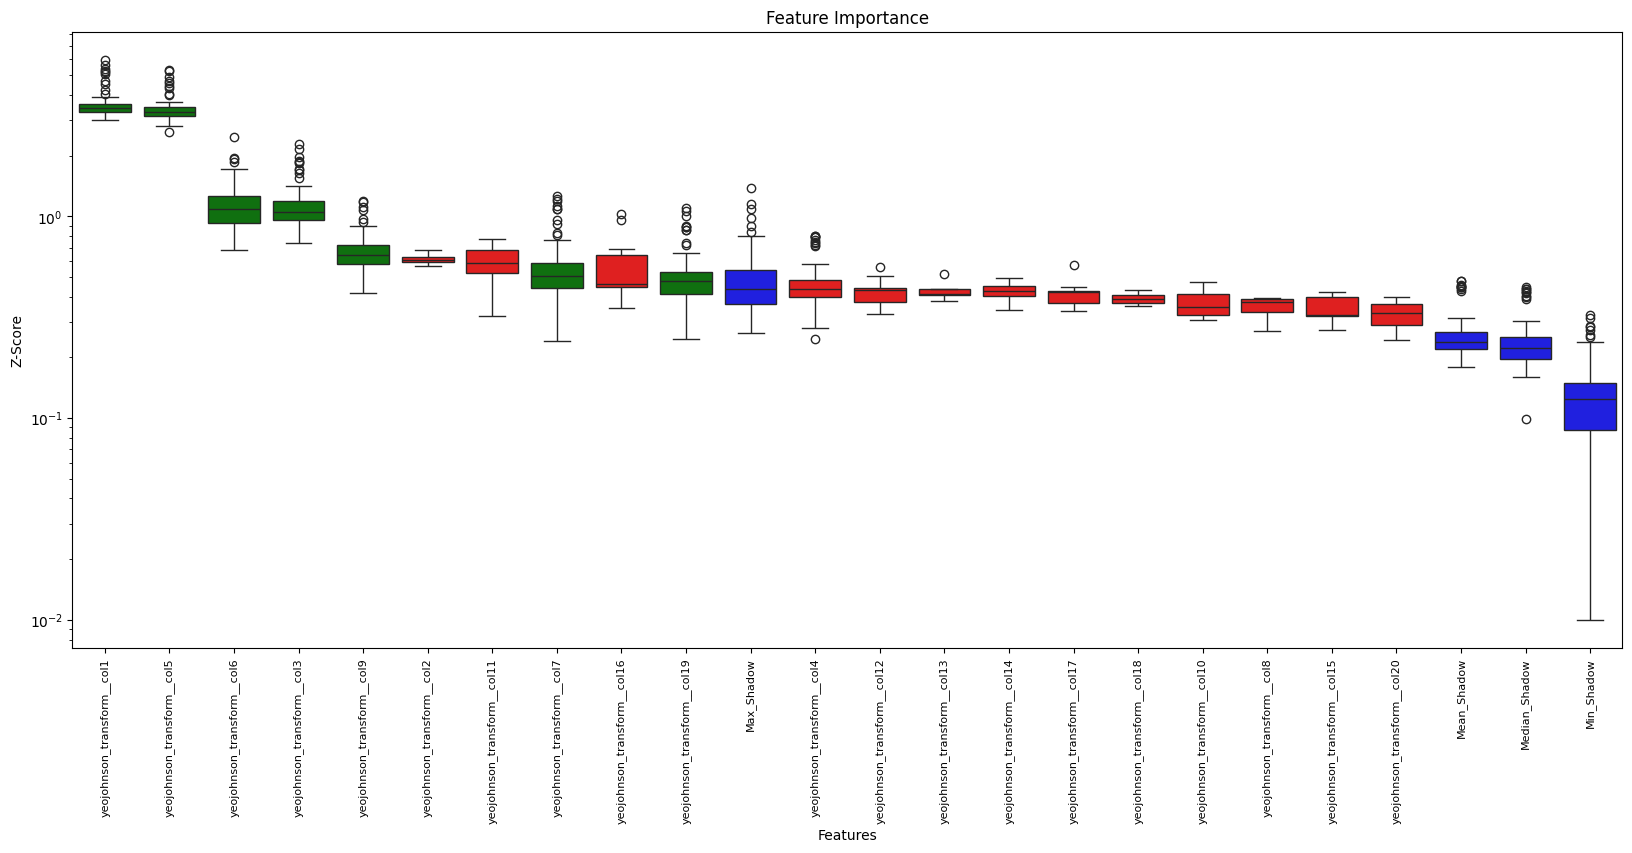

['yeojohnson_transform__col1',
 'yeojohnson_transform__col19',
 'yeojohnson_transform__col3',
 'yeojohnson_transform__col5',
 'yeojohnson_transform__col6',
 'yeojohnson_transform__col7',
 'yeojohnson_transform__col9']

In [135]:
selvars=selvars_boruta(X_train_,y_train_,isclass=True,n_trials=100)
selvars

In [136]:
selvars=['yeojohnson_transform__col1',
 'yeojohnson_transform__col16',
 'yeojohnson_transform__col3',
 'yeojohnson_transform__col4',
 'yeojohnson_transform__col5',
 'yeojohnson_transform__col6',
 'yeojohnson_transform__col7',
 'yeojohnson_transform__col9']

Tengo que validar que con el 10% de las columnas elegidas representan el conjunto del DataFrame de las columnas. 
Para ello hago un test de  Kolmogorov-Smirnov con cross validation para cada una de las columnas

# 14. <a id='toc14_'></a>[Escoger métrica del modelo](#toc0_)


## 14.1. <a id='toc14_1_'></a>[Métricas de clasificación](#toc0_)

Utilizo accuracy

# 15. <a id='toc15_'></a>[Baselines](#toc0_)


In [139]:
# Modelos de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [140]:

# Definir los modelos a comparar
modelos = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(gamma='scale', probability=True),
    'Naive Bayes': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(n_estimators=10),
    'Extra Trees': ExtraTreesClassifier(n_estimators=10),
    #'XGBoost': XGBClassifier(),
    'Random Forest':RandomForestClassifier(n_estimators=10),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LightGBM':LGBMClassifier(),
}


In [ ]:
#Meter CatBoost

In [141]:
# Reduzco el modelo a las variables seleccionadas
X_train_fs=X_train[selvars]
X_val_fs=X_val[selvars]

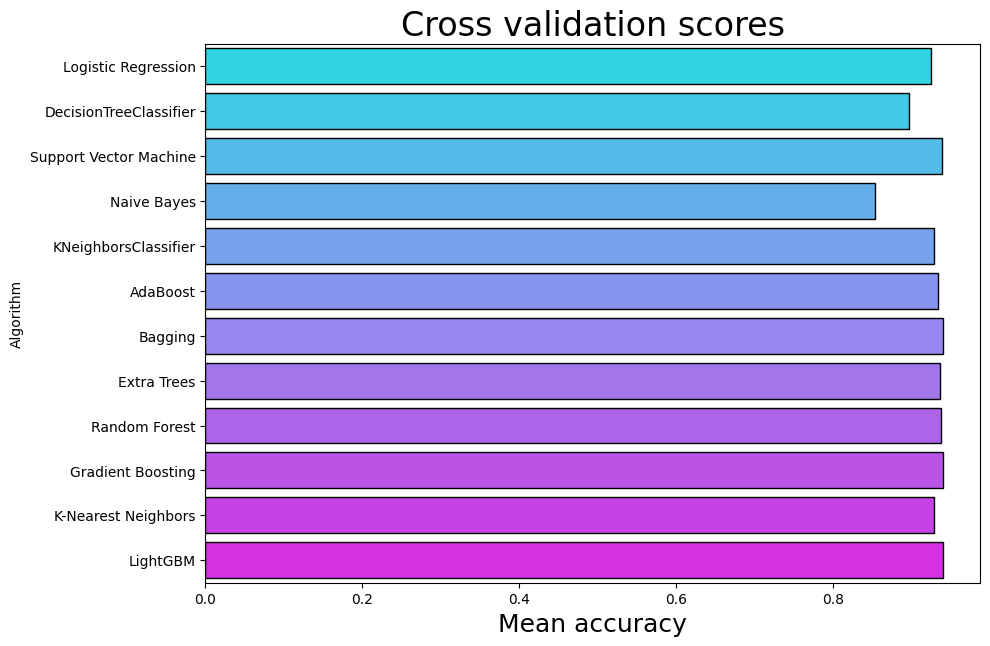

In [142]:
cv_df=perform_cross_validation(modelos, X_train_fs, y_train,  metric='accuracy')

In [143]:
from sklearn import metrics
cv_df.sort_values(by='CrossVal_Score_Means', ascending=False)

CrossVal_Score_Means               Algorithm
11                  0.94                LightGBM
9                   0.94       Gradient Boosting
6                   0.94                 Bagging
2                   0.94  Support Vector Machine
8                   0.94           Random Forest
7                   0.94             Extra Trees
5                   0.93                AdaBoost
4                   0.93    KNeighborsClassifier
10                  0.93     K-Nearest Neighbors
0                   0.92     Logistic Regression
1                   0.90  DecisionTreeClassifier
3                   0.85             Naive Bayes

## 16.3. <a id='toc16_3_'></a>[Finetuning por Pycaret](#toc0_)

In [144]:
from pycaret.classification import *

In [145]:
data=X_train_fs.copy()
data[target]=y_train.values

In [149]:

exp1 = setup(data, target=target)

models = {
    'XGBoost': create_model('xgboost'),
    'Gradient Boosting': create_model('gbc'),
    'LightGBM': create_model('lightgbm'),
    'Support Vector Machine': create_model('svm'),
    'Random Forest': create_model('rf'),
    'Extra Trees': create_model('et')
}


In [152]:
tuned_models = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}")
    tuned_model = tune_model(model, n_iter=50, optimize='recall')  # Ajuste con búsqueda aleatoria
    tuned_models[model_name] = tuned_model


Tuning hyperparameters for XGBoost


Initiated  . . . . . . . . . . . . . . . . . .                   14:20:07
Status     . . . . . . . . . . . . . . . . . .       Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .  Extreme Gradient Boosting

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Tuning hyperparameters for Gradient Boosting


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Tuning hyperparameters for LightGBM


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Tuning hyperparameters for Support Vector Machine


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Tuning hyperparameters for Random Forest


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Tuning hyperparameters for Extra Trees


Fitting 10 folds for each of 50 candidates, totalling 500 fits


# Por tanto me quedo con el modelo de Gradient Boosting

Quizás para afinar más debiera haber hecho un SMOTE para ganar más decimales... no me ha dado tiempo

# 17. <a id='toc17_'></a>[Validación, prestaciones, ROC AUC](#toc0_)


In [ ]:
from sklearn.model_selection import learning_curve,LearningCurveDisplay
from sklearn.model_selection import ShuffleSplit

In [ ]:
X_val_fs=X_val[selvars]

In [ ]:
for model_name,model_tuned in tuned_models.items():
    print('**'*30)
    print('--'*30)
    print(model_name)
    print('--'*30)
    print()
    print('=> CONFUSION MATRIX')
    y_pred = model_tuned.predict(X_val_fs)
    plot_confusion_matrix(y_val, y_pred)
    cross_validation_with_confusion_matrix(model_tuned, X_val_fs, y_val, nsplits=10)
    Classification_report = pd.DataFrame.from_dict(classification_report(y_val, y_pred, output_dict=True)).T
    Classification_report
    print('--'*30)
    print()
    print('=>  ROC')
    print()
    generate_roc_auc(model_tuned, X_train_fs, y_train, X_val_fs, y_val)
    print('=>  ANÁLISIS OVERFITTING')
    print()
    test_size_coef=0.2
    cv=5
    train_sizes=np.linspace(0.1, 1.0, 10)
    score='recall_macro'
    t_size=0.15
    perc_pca=0.95
    thresh_norm=0.05
    steps=5

    train_sizes, train_scores, test_scores=learning_curve(model_tuned, X_train_fs, y_train, cv=ShuffleSplit(n_splits=50, test_size=t_size, random_state=0), 
                                                          n_jobs=-1, train_sizes=np.linspace(0.1, 1.0,steps), scoring=score)
    display = LearningCurveDisplay(train_sizes=train_sizes,
        train_scores=train_scores, test_scores=test_scores, score_name=score)
    display.plot()
    plt.show()
    
    